In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv( r"C:\Users\Dell\Desktop\dev데이터분석\project2_bank\bank_proscessing.csv")
data.head()

# 시각화를 위한 폰트 설정 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Num,Marital_Status_Num,Income_Category_Num,Card_Category_Num
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,11914.0,1.335,1144,42,1.625,0.061,2,2,3,0
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,7392.0,1.541,1291,33,3.714,0.105,4,1,1,0
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,2.594,1887,20,2.333,0.000,4,2,2,0
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,796.0,1.405,1171,20,2.333,0.760,2,0,1,0
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,2.175,816,28,2.500,0.000,1,2,3,0


In [5]:
# 결측치 확인
missing_values = data.isnull().sum()
missing_values

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Education_Level_Num         0
Marital_Status_Num          0
Income_Category_Num         0
Card_Category_Num           0
dtype: int64

In [6]:
data.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Num,Marital_Status_Num,Income_Category_Num,Card_Category_Num
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127,10127,10127,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,NaN,NaN,NaN,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,0.839340,46.325960,0.470919,2.346203,NaN,NaN,NaN,NaN,35.928409,...,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,2.601955,1.536585,2.136072,0.083638
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,NaN,NaN,NaN,NaN,7.986416,...,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,1.700417,0.737808,1.504700,0.333784
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,13.000000,...,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.130368e+08,1.000000,41.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,31.000000,...,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,1.000000,1.000000,1.000000,0.000000
50%,7.179264e+08,1.000000,46.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,36.000000,...,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,3.000000,2.000000,2.000000,0.000000
75%,7.731435e+08,1.000000,52.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,40.000000,...,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,4.000000,2.000000,3.000000,0.000000


In [7]:
data['Attrition_Flag'].value_counts()
data['Income_Category_Num'].value_counts()

Income_Category_Num
1    3561
4    1790
2    1535
3    1402
0    1112
5     727
Name: count, dtype: int64

데이터상관관계 확인, 박스프롯 확인후 가설설정

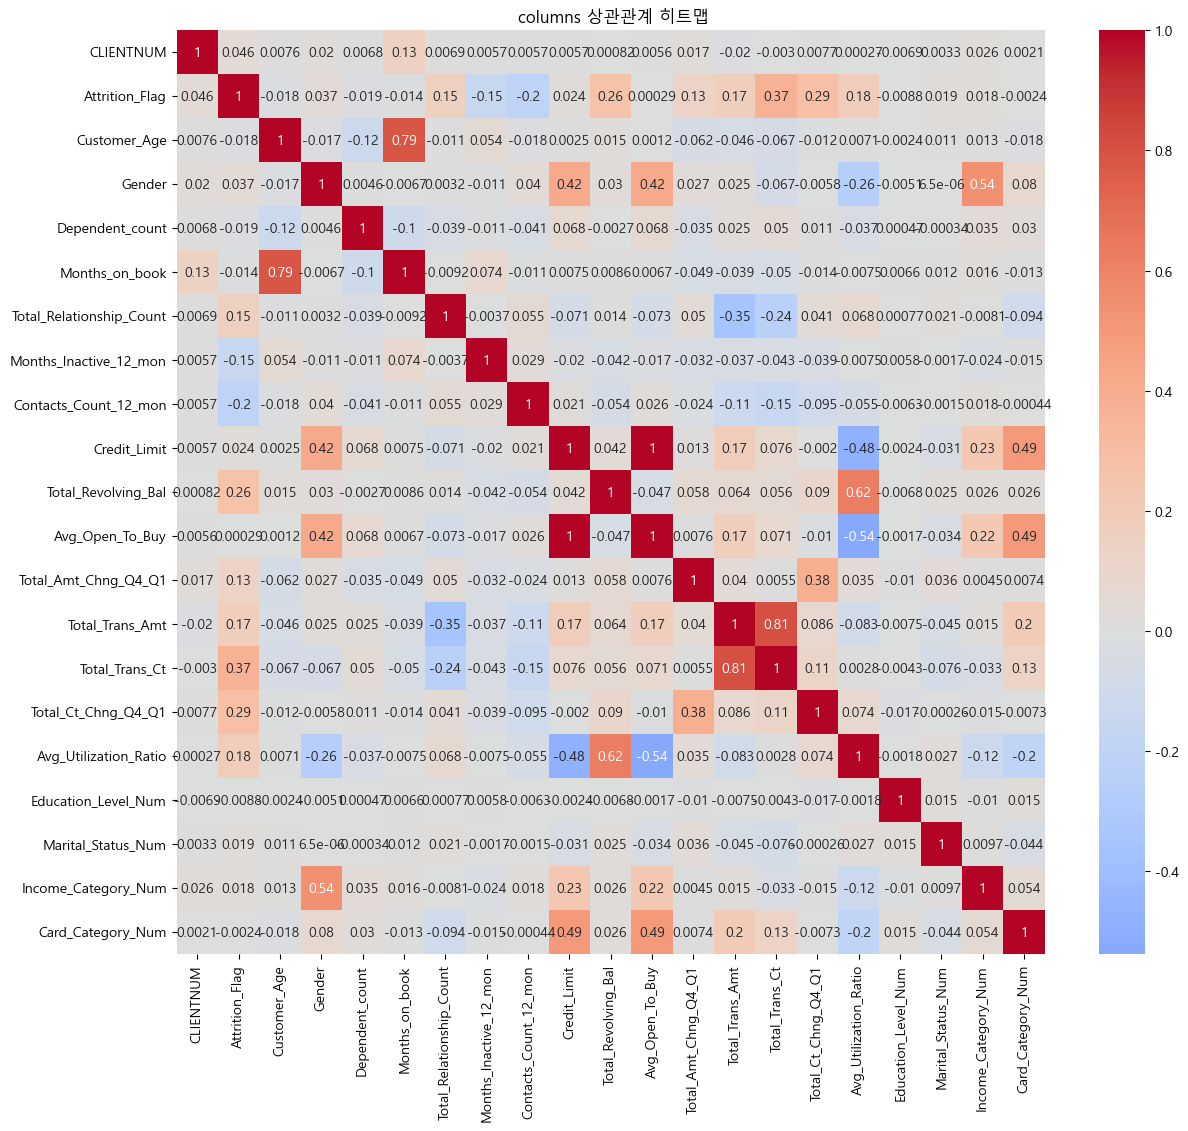

In [8]:
numeric_columns = data.select_dtypes(include=['number'])
processed_correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(processed_correlation_matrix, annot=True, cmap='coolwarm', center=0)


plt.title(' columns 상관관계 히트맵')


plt.show()


In [9]:

correlation_matrix = processed_correlation_matrix.corr()

# 잔존율 양의상관관계 상위 10개 컬럼
top_correlations = correlation_matrix['Attrition_Flag'].sort_values(ascending=False).head(10)

# 잔존율 음의 상관관계 하위 10개 컬럼
bottom_correlations = correlation_matrix['Attrition_Flag'].sort_values().head(10)

top_correlations, bottom_correlations

(Attrition_Flag              1.000000
 Total_Trans_Ct              0.489501
 Total_Ct_Chng_Q4_Q1         0.474689
 Total_Revolving_Bal         0.393839
 Avg_Utilization_Ratio       0.320781
 Total_Trans_Amt             0.295577
 Total_Amt_Chng_Q4_Q1        0.222460
 Total_Relationship_Count    0.098262
 CLIENTNUM                  -0.043394
 Marital_Status_Num         -0.075455
 Name: Attrition_Flag, dtype: float64,
 Contacts_Count_12_mon    -0.500601
 Months_Inactive_12_mon   -0.397369
 Months_on_book           -0.196441
 Avg_Open_To_Buy          -0.190849
 Customer_Age             -0.184884
 Credit_Limit             -0.169056
 Gender                   -0.159956
 Income_Category_Num      -0.153606
 Card_Category_Num        -0.138845
 Education_Level_Num      -0.122408
 Name: Attrition_Flag, dtype: float64)

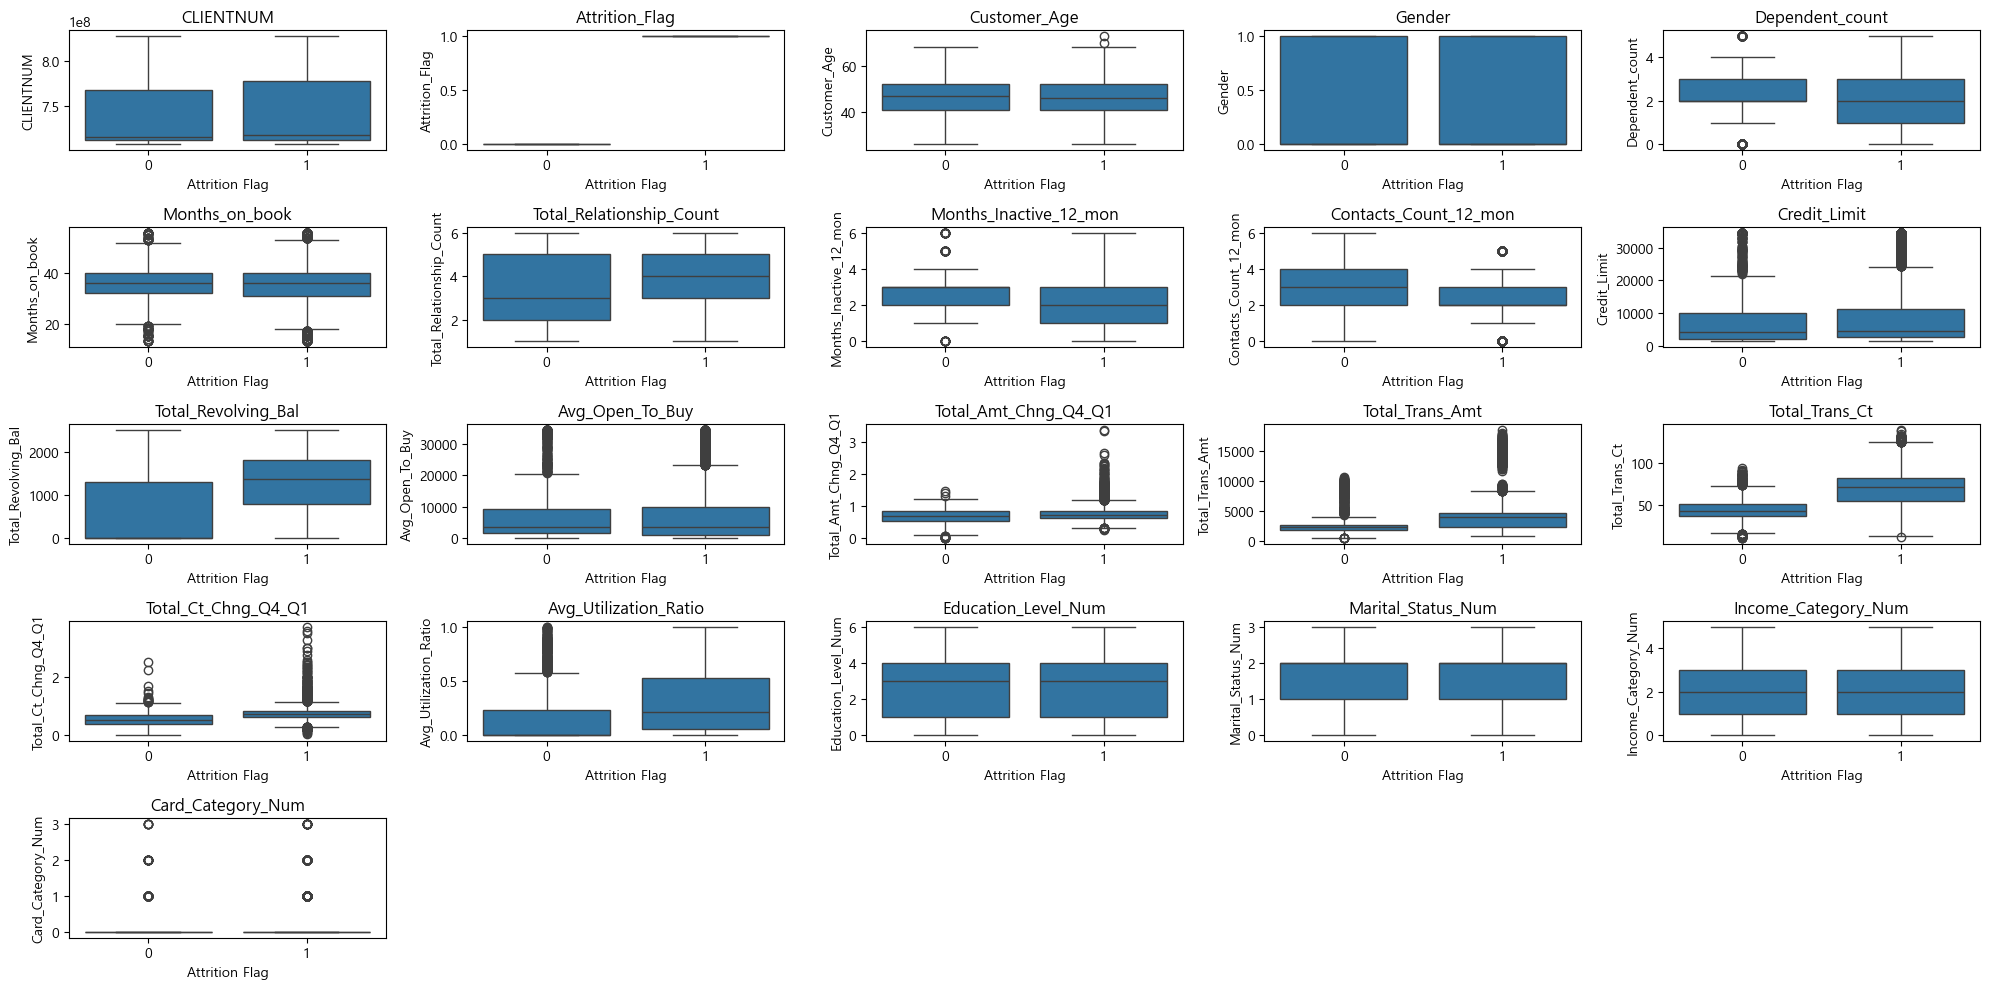

In [10]:


# 숫자형 데이터만 선택
numeric_columns = data.select_dtypes(include=[int, float]).columns

# 'CLIENTNUM'과 Naive_Bayes 컬럼 제거
#numeric_columns = numeric_columns.difference(['CLIENTNUM', 'Naive_Bayes_1', 'Naive_Bayes_2'])

# 데이터 컬럼 중 숫자형 컬럼들만 선택
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# 박스 플롯 그리기
plt.figure(figsize=(20, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)  # 서브플롯 행렬
    sns.boxplot(x='Attrition_Flag', y=column, data=data)
    plt.title(column)
    plt.xlabel('Attrition Flag')
    plt.ylabel(column)
    plt.xticks([0, 1], ['0', '1'])

plt.tight_layout()
plt.show()


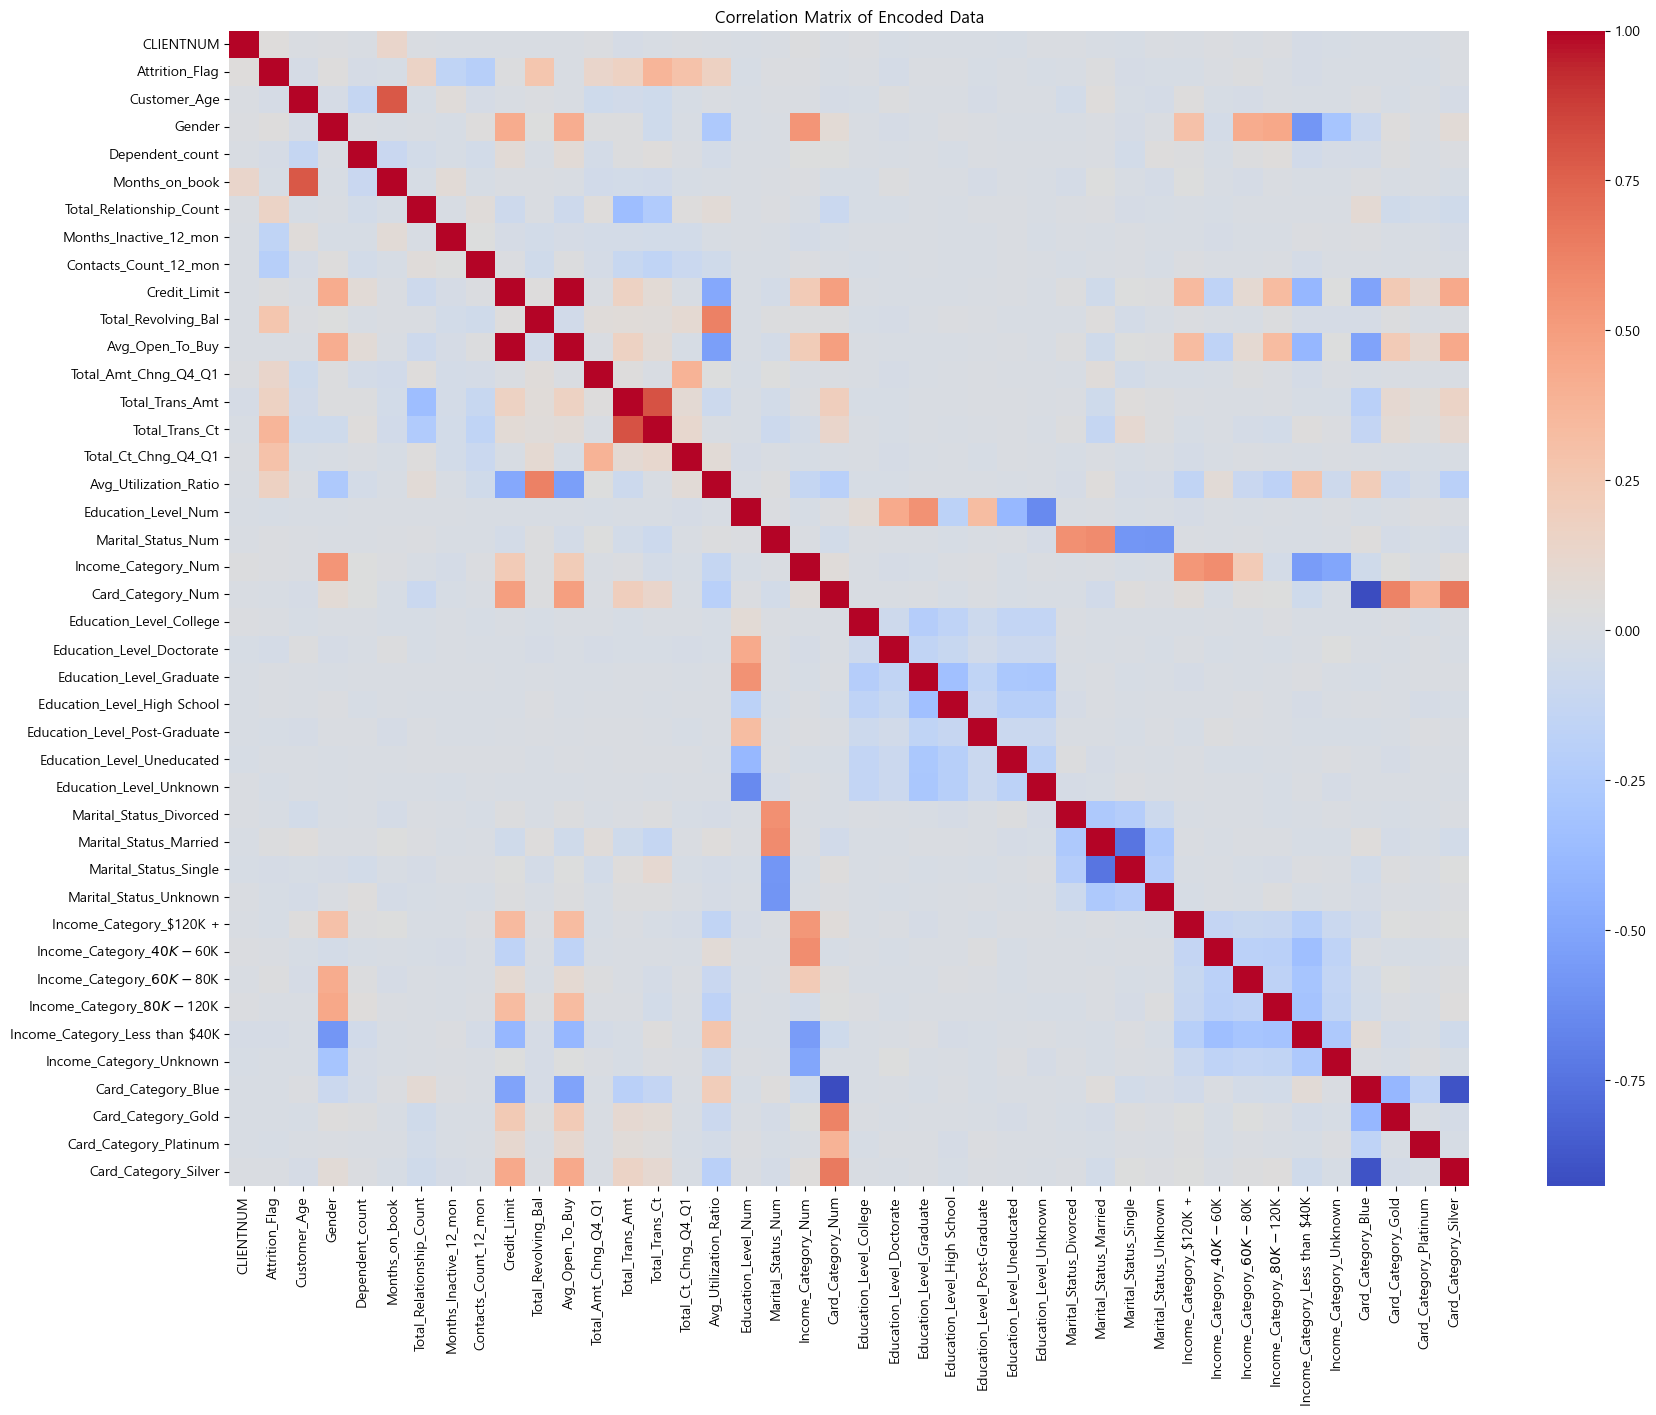

In [11]:

# One-Hot Encoding을 사용하여 문자형 데이터를 숫자형으로 변환
encoded_data = pd.get_dummies(data)

# 상관관계 분석
correlation_matrix = encoded_data.corr()

# 상관관계 표 시각화
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Encoded Data')
plt.show()

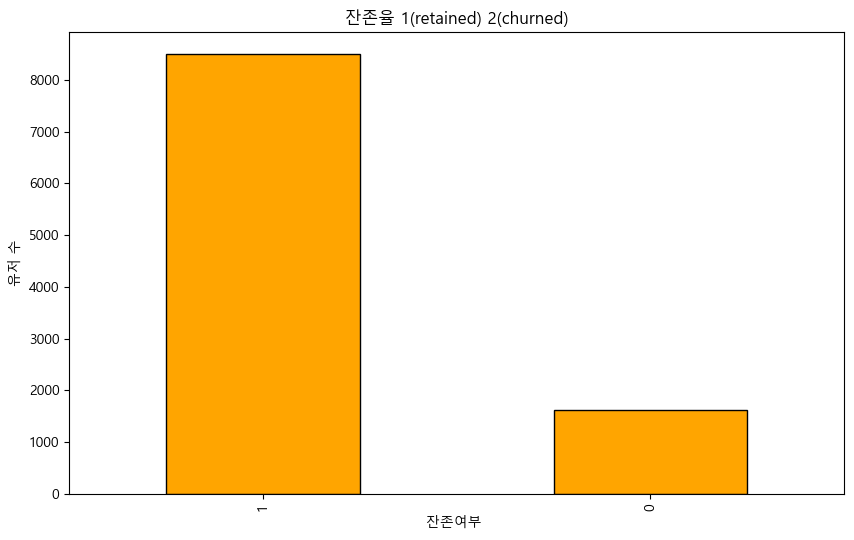

Text(0.5, 1.0, 'Attrition_Flag')

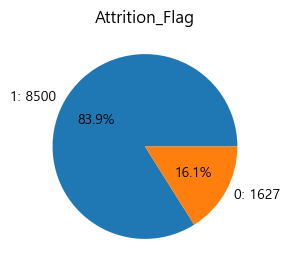

In [15]:
# 잔존율 비율 계산
retained_count = data['Attrition_Flag'].value_counts()[1]
churned_count = data['Attrition_Flag'].value_counts()[0]
total_count = len(data)

retained_ratio = retained_count / total_count
churned_ratio = churned_count / total_count

retained_ratio, churned_ratio

# 잔존율시각화
plt.figure(figsize=(10, 6))
data['Attrition_Flag'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('잔존율 1(retained) 2(churned)')
plt.xlabel('잔존여부 ')
plt.ylabel('유저 수')
plt.show()

# Pie chart
fig = plt.figure(figsize=(3,3))
datapie=data['Attrition_Flag'].value_counts()
plt.pie(datapie,
        labels=[f'{datapie.index[0]}: {datapie.values[0]}',
                f'{datapie.index[1]}: {datapie.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Attrition_Flag')


이탈율 비율이 16% .. 

- 가설설정
    1. Total Trans cnt (12개월간 거래 건수)가 높으면 이탈율이 낮을것이다. 
        - 자주 사용하는 은행일 확률 높음
    2. Total_Ct_Chng_Q4_Q1 (1분기 대비 4분기 거래건수 변화) 가 높으면 이탈율이 낮을것이다.
    3. Total_Revolving_Bal (신용카드의 총 회전잔액) 이높으면 이탈율이 낮을것 
    4. Contacts_Count_12_mon  12개월 내 은행 접촉 횟수 많을수록 이탈율이 낮을것 
        1. 박스플롯 볼때 12개월 내  은행 접촉 횟수가 카드 유지 회원이 더 낮다 
        2. 왜 유지고객이 은행을 더 방문 안한것인가 ?? 
    5.  Months_Inactive_12_mon 12개월 내 비활성화된 개월 수 가 높을수록 이탈율 높을
    6.  Months_on_book 은행 서비스 유지 개월수 가 높을수록 이탈율 낮을듯

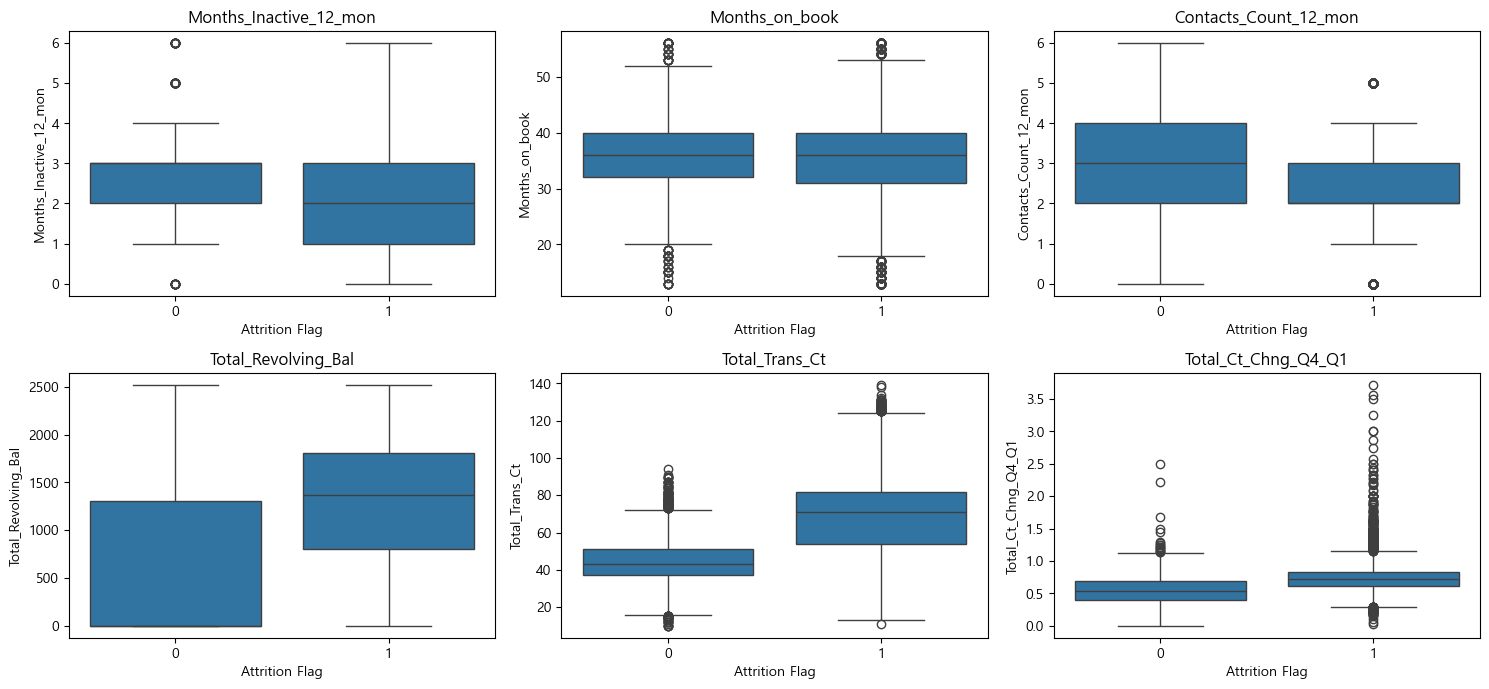

In [12]:
# 상관관계 높은 6가지
columns_5 = {'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal',
             'Contacts_Count_12_mon','Months_Inactive_12_mon','Months_on_book'}

# 'CLIENTNUM'과 Naive_Bayes 컬럼 제거
#numeric_columns = numeric_columns.difference(['CLIENTNUM', 'Naive_Bayes_1', 'Naive_Bayes_2'])

# 데이터 컬럼 중 숫자형 컬럼들만 선택
#numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# 박스 플롯 그리기
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_5, 1):
    plt.subplot(3, 3, i)  # 서브플롯 행렬
    sns.boxplot(x='Attrition_Flag', y=column, data=data)
    plt.title(column)
    plt.xlabel('Attrition Flag')
    plt.ylabel(column)
    plt.xticks([0, 1], ['0', '1'])

plt.tight_layout()
plt.show()

In [17]:
data['Months_on_book'].describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

## AGE

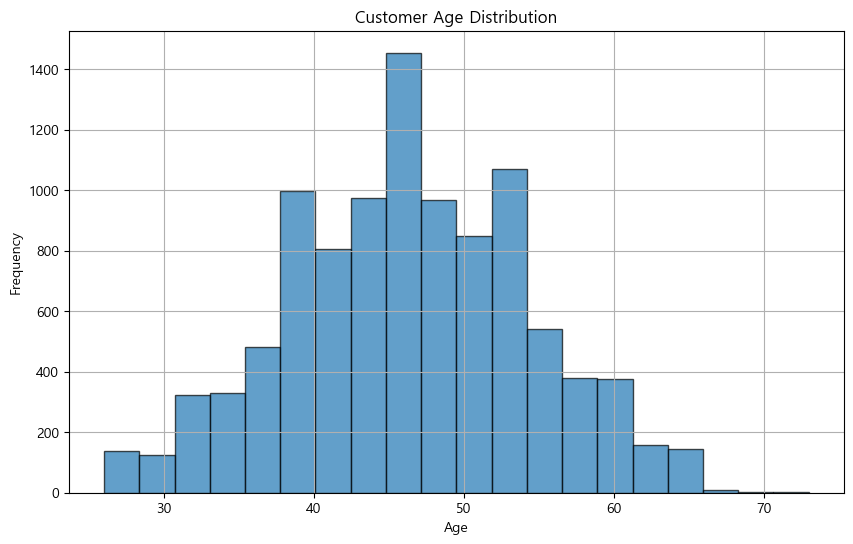

In [47]:


# Customer_Age에 대한 히스토그램 bins=20
plt.figure(figsize=(10, 6))
plt.hist(data['Customer_Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


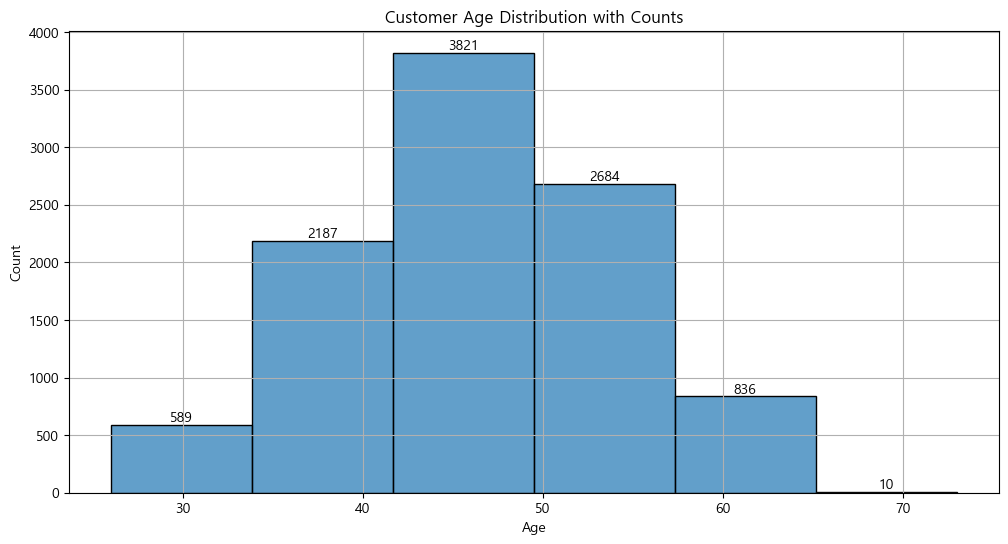

In [17]:
# Customer_Age에 대한 히스토그램 bins를 6, 6이적합할듯 
plt.figure(figsize=(12, 6))
hist_plot = sns.histplot(data=data, x='Customer_Age', bins=6, edgecolor='k', alpha=0.7)
plt.title('Customer Age Distribution with Counts')
plt.xlabel('Age')
plt.ylabel('Count')

# 각 막대에 레이블 추가
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:
        hist_plot.annotate(f'{height:.0f}', 
                           (patch.get_x() + patch.get_width() / 2., height), 
                           ha='center', va='center', 
                           xytext=(0, 5), 
                           textcoords='offset points', 
                           fontsize=10)

# x축 레이블 설정
#hist_plot.set_xticklabels([f'{interval.left:.0f}-{interval.right:.0f}' for interval in pd.cut(data['Customer_Age'], bins=6)])

plt.grid(True)
plt.show()


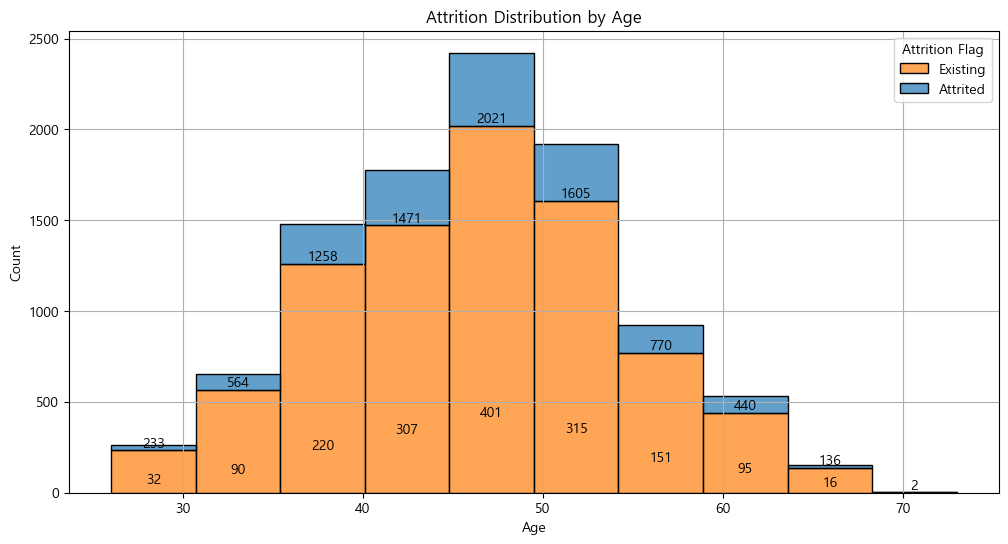

In [20]:
# Attrition_Flag의 0이 아래로 가게 하는 코드
plt.figure(figsize=(12, 6))
attrition_plot = sns.histplot(data=data, x='Customer_Age', hue='Attrition_Flag', multiple='stack', bins=10, edgecolor='k', alpha=0.7)
plt.title('Attrition Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# 각 막대에 레이블 추가
for patch in attrition_plot.patches:
    height = patch.get_height()
    if height > 0:
        attrition_plot.annotate(f'{height:.0f}', 
                                (patch.get_x() + patch.get_width() / 2., height), 
                                ha='center', va='center', 
                                xytext=(0, 5), 
                                textcoords='offset points', 
                                fontsize=10)
        

plt.legend(title='Attrition Flag', labels=['Existing', 'Attrited'])
plt.grid(True)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\1792616271.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = data.groupby(age_bins)['Attrition_Flag'].value_counts(normalize=True).unstack().fillna(0) * 100


<Figure size 1200x600 with 0 Axes>

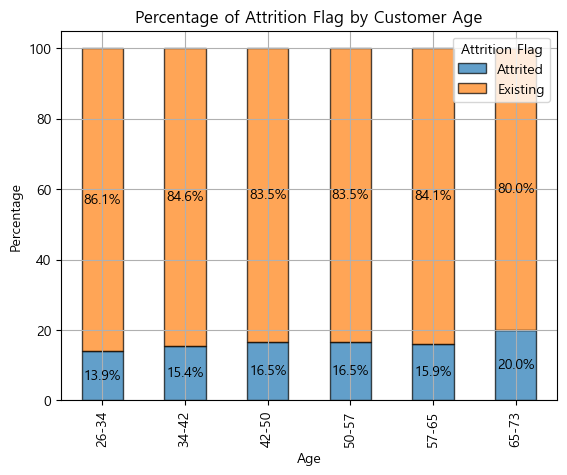

In [18]:
# 나이별로 Attrition_Flag의 퍼센트를 계산하여 시각화, bins를 6으로 설정
age_bins = pd.cut(data['Customer_Age'], bins=6)
age_attrition = data.groupby(age_bins)['Attrition_Flag'].value_counts(normalize=True).unstack().fillna(0) * 100

# 시각화
plt.figure(figsize=(12, 6))
age_attrition_plot = age_attrition.plot(kind='bar', stacked=True, edgecolor='k', alpha=0.7)
plt.title('Percentage of Attrition Flag by Customer Age')
plt.xlabel('Age')
plt.ylabel('Percentage')

# 각 막대에 퍼센트 레이블 추가
for p in age_attrition_plot.patches:
    height = p.get_height()
    if height > 0:
        age_attrition_plot.annotate(f'{height:.1f}%', 
                                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2), 
                                    ha='center', va='center', 
                                    xytext=(0, 0), 
                                    textcoords='offset points', 
                                    fontsize=10)

# x축 레이블 설정
age_attrition_plot.set_xticklabels([f'{interval.left:.0f}-{interval.right:.0f}' for interval in age_attrition.index])

plt.legend(title='Attrition Flag', labels=['Attrited', 'Existing'])
plt.grid(True)
plt.show()


In [20]:
# 나이를 지정한 세그먼트로 나누고 각 세그먼트에 몇 명의 사람이 있는지 계산
#74...... 1명
age_segments = pd.cut(data['Customer_Age'], bins=[26, 34, 42, 50, 57, 65, 74], right=False)
segment_counts = age_segments.value_counts().sort_index()
segment_counts


Customer_Age
[26, 34)     589
[34, 42)    2187
[42, 50)    3821
[50, 57)    2461
[57, 65)     958
[65, 74)     111
Name: count, dtype: int64

In [167]:
# # 나이를 지정한 세그먼트로 나누고 각 세그먼트에 몇 명의 사람이 있는지 계산
# age_segments = pd.cut(data['Customer_Age'], bins=[26, 35, 45, 55, 65, 73], right=False)
# segment_counts = age_segments.value_counts().sort_index()
# segment_counts


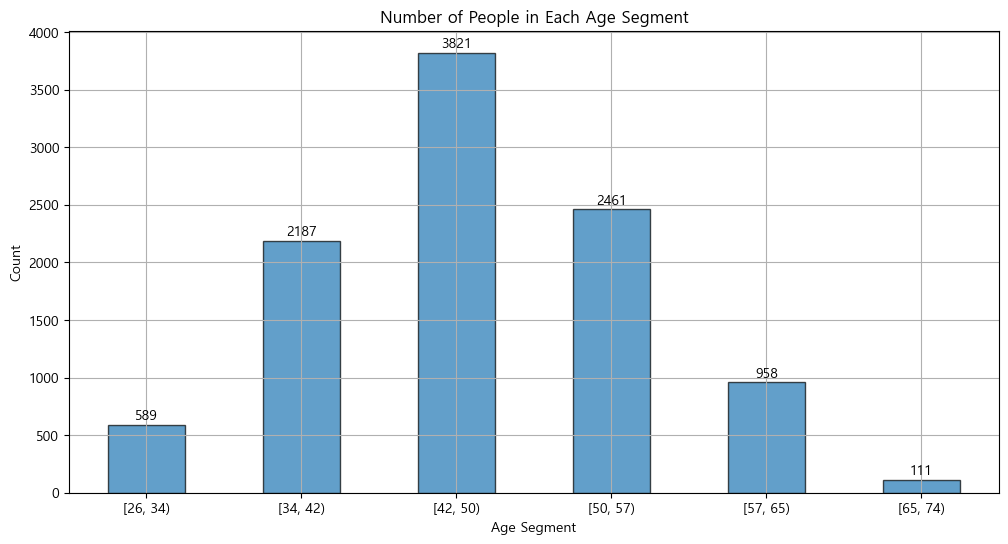

In [21]:
# 나이 세그먼트별 사람 수를 시각화
plt.figure(figsize=(12, 6))
segment_counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Number of People in Each Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 각 막대에 레이블 추가
for index, value in enumerate(segment_counts):
    plt.text(index, value + 20, f'{value}', ha='center', va='bottom', fontsize=10)

plt.grid(True)
plt.show()




65-73 구간에서 이탈고객비율이  늘어나 왜?? 
나이별\
-> gender 비교 \
-> 혼인상태 비교 \
-> 부양가족 비교 \

In [24]:
# 나이 세그먼트 기준으로 Gender와 Attrition_Flag에 따른 데이터 분석
# 나이 세그먼트 추가
data['Age_Segment'] = pd.cut(data['Customer_Age'], bins=[26, 34, 42, 50, 57, 65, 74], right=False)

# 나이 세그먼트, Gender, Attrition_Flag에 따른 데이터 그룹화 및 개수 계산
segment_gender_attrition = data.groupby(['Age_Segment', 'Gender', 'Attrition_Flag']).size().unstack(fill_value=0)
segment_gender_attrition


C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\3648203070.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_gender_attrition = data.groupby(['Age_Segment', 'Gender', 'Attrition_Flag']).size().unstack(fill_value=0)


Attrition_Flag        0     1
Age_Segment Gender           
[26, 34)    0        40   248
            1        42   259
[34, 42)    0       193   939
            1       143   912
[42, 50)    0       368  1671
            1       264  1518
[50, 57)    0       244  1088
            1       165   964
[57, 65)    0        79   429
            1        78   372
[65, 74)    0         6    53
            1         5    47

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  int64   
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  int64   
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [25]:
counts = data.groupby(['Gender', 'Attrition_Flag']).size().reset_index(name='Frequency')
counts

,Gender,Attrition_Flag,Frequency
0,0,0,930
1,0,1,4428
2,1,0,697
3,1,1,4072


In [105]:
# # 나이 세그먼트, Gender, Attrition_Flag에 따른 데이터 시각화
# plt.figure(figsize=(14, 8))

# # 시각화를 위해 멀티 인덱스를 풀고, 데이터를 재구성
# segment_gender_attrition_reset = segment_gender_attrition.reset_index()
# segment_gender_attrition_melt = segment_gender_attrition_reset.melt(id_vars=['Age_Segment', 'Gender'], var_name='Attrition_Flag', value_name='Count')

# # 시각화
# sns.catplot(x='Age_Segment', y='Count', hue='Attrition_Flag', col='Gender', kind='bar', data=segment_gender_attrition_melt, height=6, aspect=1.2)
# plt.subplots_adjust(top=0.85)
# plt.suptitle('Age Segment, Gender, and Attrition Analysis')

# plt.show()


In [27]:
# age > 65 10개 ..한두명씩 분포되어있음 
age_under65=data['Customer_Age']<=65
d1=data.loc[age_under65]

나이별- Attrition_Flag

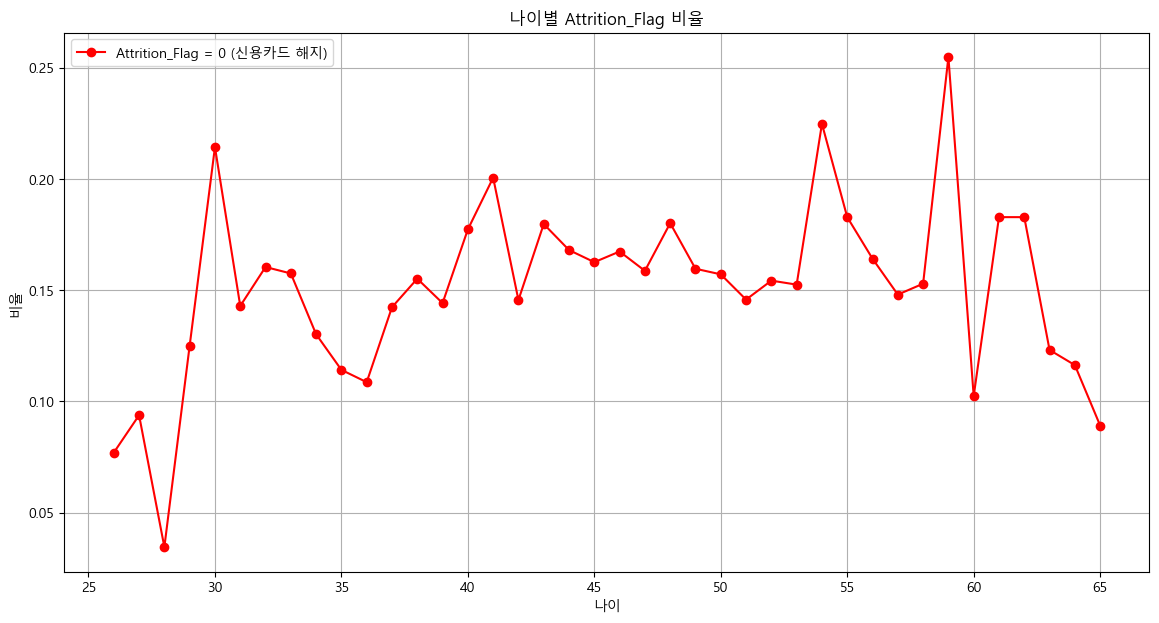

In [28]:
# 나이별 Attrition_Flag이 0인 경우와 1인 경우의 비율을 계산
age_attrition_0 = d1[d1['Attrition_Flag'] == 0].groupby('Customer_Age').size() / d1.groupby('Customer_Age').size()
#age_attrition_1 = d1[d1['Attrition_Flag'] == 1].groupby('Customer_Age').size() / d1.groupby('Customer_Age').size()

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(age_attrition_0.index, age_attrition_0.values, marker='o', color='red', label='Attrition_Flag = 0 (신용카드 해지)')
#plt.plot(age_attrition_1.index, age_attrition_1.values, marker='o', color='blue', label='Attrition_Flag = 1 (신용카드 유지)')
plt.title('나이별 Attrition_Flag 비율')
plt.xlabel('나이')
plt.ylabel('비율')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


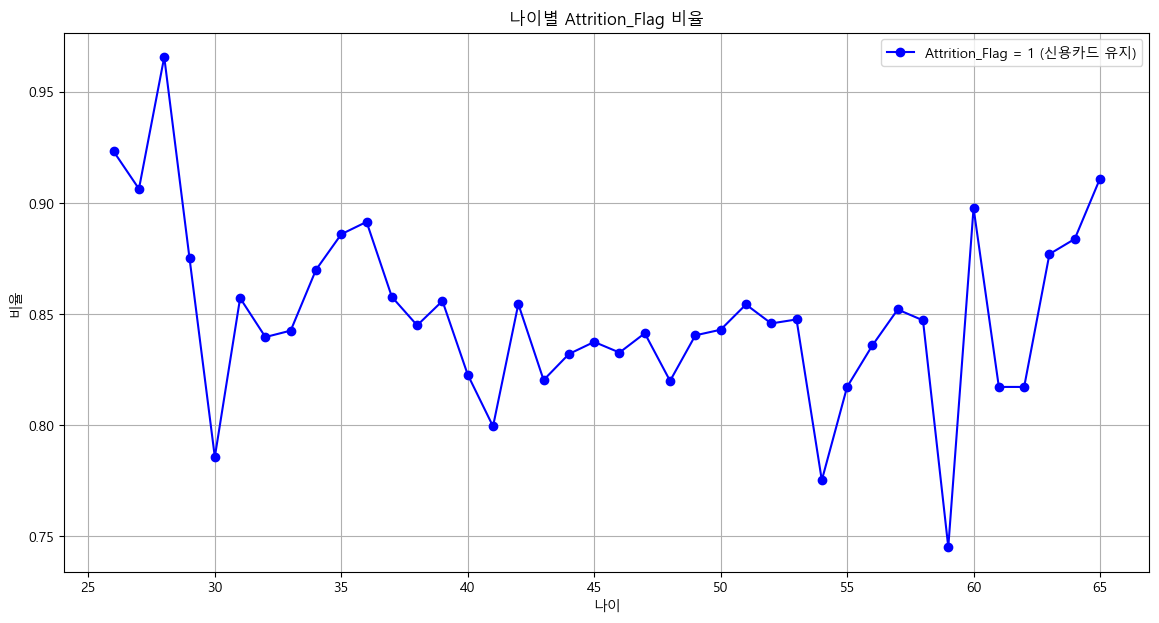

In [29]:
# 나이별 Attrition_Flag이 0인 경우와 1인 경우의 비율을 계산
#age_attrition_0 = d1[d1['Attrition_Flag'] == 0].groupby('Customer_Age').size() / d1.groupby('Customer_Age').size()
age_attrition_1 = d1[d1['Attrition_Flag'] == 1].groupby('Customer_Age').size() / d1.groupby('Customer_Age').size()

# 시각화
plt.figure(figsize=(14, 7))
#plt.plot(age_attrition_0.index, age_attrition_0.values, marker='o', color='red', label='Attrition_Flag = 0 (신용카드 해지)')
plt.plot(age_attrition_1.index, age_attrition_1.values, marker='o', color='blue', label='Attrition_Flag = 1 (신용카드 유지)')
plt.title('나이별 Attrition_Flag 비율')
plt.xlabel('나이')
plt.ylabel('비율')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()



Segment나이 - 성별 - Attririon-Flag

<Figure size 1400x800 with 0 Axes>

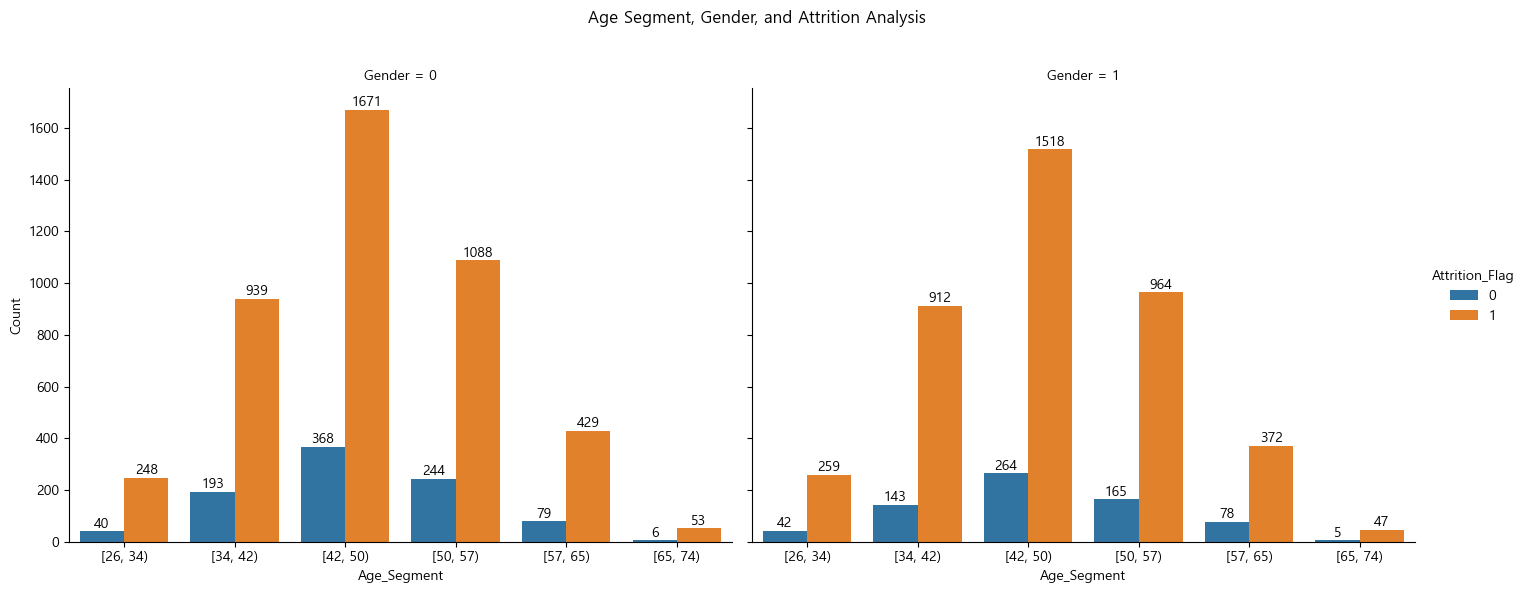

In [32]:
# 나이 세그먼트, Gender, Attrition_Flag에 따른 데이터 시각화
plt.figure(figsize=(14, 8))

# 시각화를 위해 멀티 인덱스를 풀고, 데이터를 재구성
segment_gender_attrition_reset = segment_gender_attrition.reset_index()
segment_gender_attrition_melt = segment_gender_attrition_reset.melt(id_vars=['Age_Segment', 'Gender'], var_name='Attrition_Flag', value_name='Count')

# 시각화
g = sns.catplot(x='Age_Segment', y='Count', hue='Attrition_Flag', col='Gender', kind='bar', data=segment_gender_attrition_melt, height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age Segment, Gender, and Attrition Analysis')

# 각 막대에 레이블 추가
for ax in g.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points', 
                        fontsize=10)

plt.show()


나이 - 결혼상태

C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\2308291709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_marital_status = data.groupby(['Age_Segment', 'Marital_Status']).size().unstack(fill_value=0)


<Figure size 1400x800 with 0 Axes>

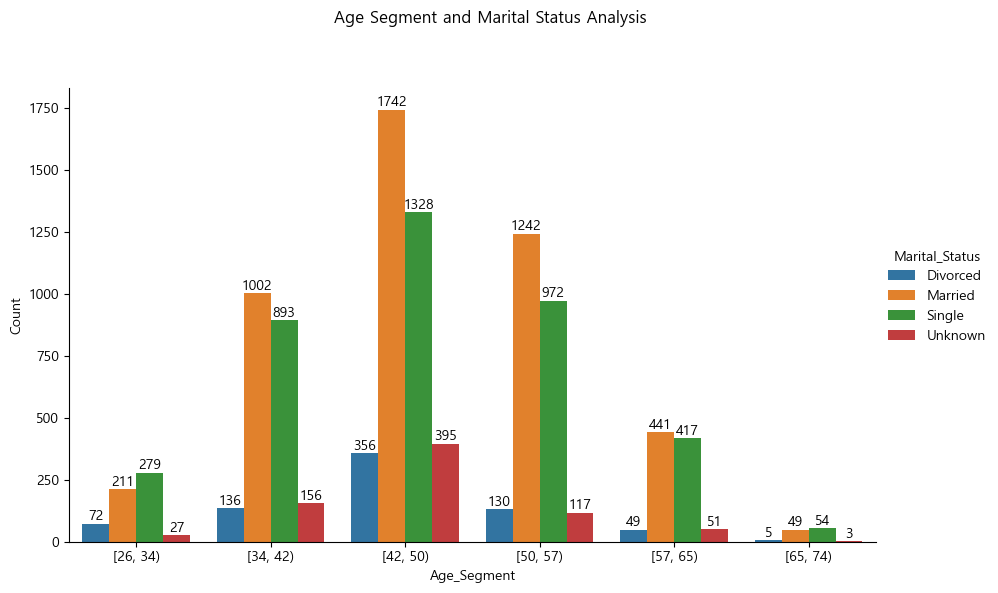

In [33]:
# 나이 세그먼트 기준으로 Marital_Status에 따른 데이터 분석
segment_marital_status = data.groupby(['Age_Segment', 'Marital_Status']).size().unstack(fill_value=0)

# 시각화를 위해 멀티 인덱스를 풀고, 데이터를 재구성
segment_marital_status_reset = segment_marital_status.reset_index()
segment_marital_status_melt = segment_marital_status_reset.melt(id_vars=['Age_Segment'], var_name='Marital_Status', value_name='Count')

# 시각화
plt.figure(figsize=(14, 8))
marital_status_plot = sns.catplot(x='Age_Segment', y='Count', hue='Marital_Status', kind='bar', data=segment_marital_status_melt, height=6, aspect=1.5)
plt.subplots_adjust(top=0.85)
marital_status_plot.fig.suptitle('Age Segment and Marital Status Analysis')

# 각 막대에 레이블 추가
for ax in marital_status_plot.axes.flatten():
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        xytext=(0, 5), 
                        textcoords='offset points', 
                        fontsize=10)

plt.show()


1. 대다수 그룹들이 이혼<싱글<결혼 그래프 형태를 보임
2. 26-34 그룹과 65-73 그룹에서는 이혼< 결혼 < 싱글
혼인상태별 이탈율 분석

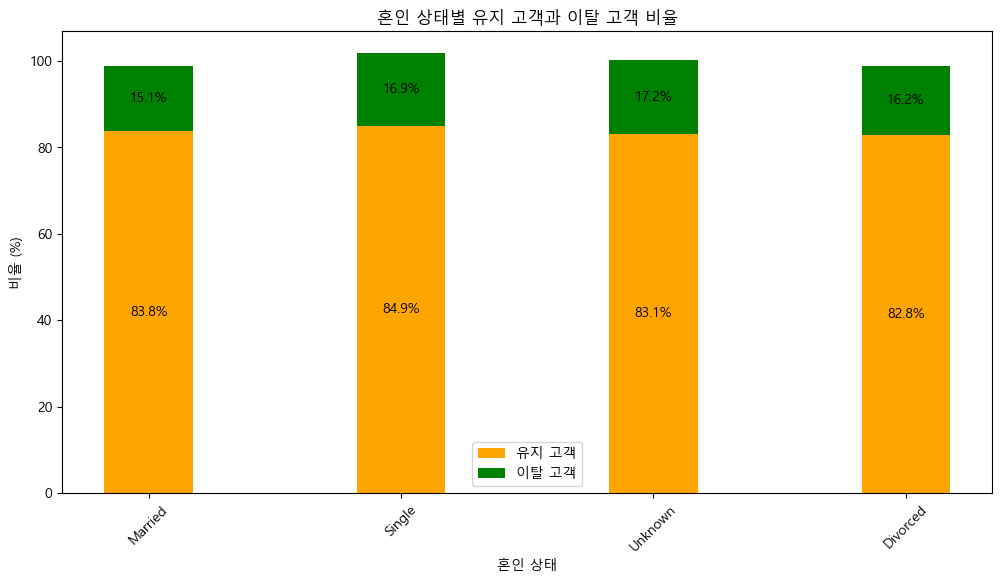

In [29]:
# 혼인 상태별 유지 고객과 이탈 고객 비율 계산
marital_status_total = data['Marital_Status'].value_counts()
marital_status_retained = data[data['Attrition_Flag'] == 1]['Marital_Status'].value_counts()
marital_status_attrited = data[data['Attrition_Flag'] == 0]['Marital_Status'].value_counts()

# 비율 계산
marital_status_retained_rate = marital_status_retained / marital_status_total * 100
marital_status_attrited_rate = marital_status_attrited / marital_status_total * 100

# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = marital_status_total.index

p1 = plt.bar(index, marital_status_retained_rate, bar_width, label='유지 고객', color='orange')
p2 = plt.bar(index, marital_status_attrited_rate, bar_width, bottom=marital_status_retained_rate, label='이탈 고객', color='green')

plt.title('혼인 상태별 유지 고객과 이탈 고객 비율')
plt.xlabel('혼인 상태')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.legend()

for rect in p1 + p2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, rect.get_y() + height / 2.0,
             f'{height:.1f}%', ha='center', va='center')

plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\3197599103.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_months_on_book = data.groupby('Age_Segment')['Months_on_book'].describe()


              count       mean       std   min    25%   50%   75%   max
Age_Segment                                                            
[26, 34)      589.0  23.617997  7.862017  13.0  18.00  22.0  28.0  36.0
[34, 42)     2187.0  29.421582  5.268339  13.0  26.00  30.0  34.0  37.0
[42, 50)     3821.0  35.346244  4.303381  13.0  33.00  36.0  38.0  45.0
[50, 57)     2461.0  40.739537  4.825493  21.0  36.00  41.0  45.0  52.0
[57, 65)      958.0  46.563674  6.566405  29.0  41.25  48.0  52.0  56.0
[65, 74)      111.0  51.036036  7.229897  36.0  49.00  54.0  56.0  56.0


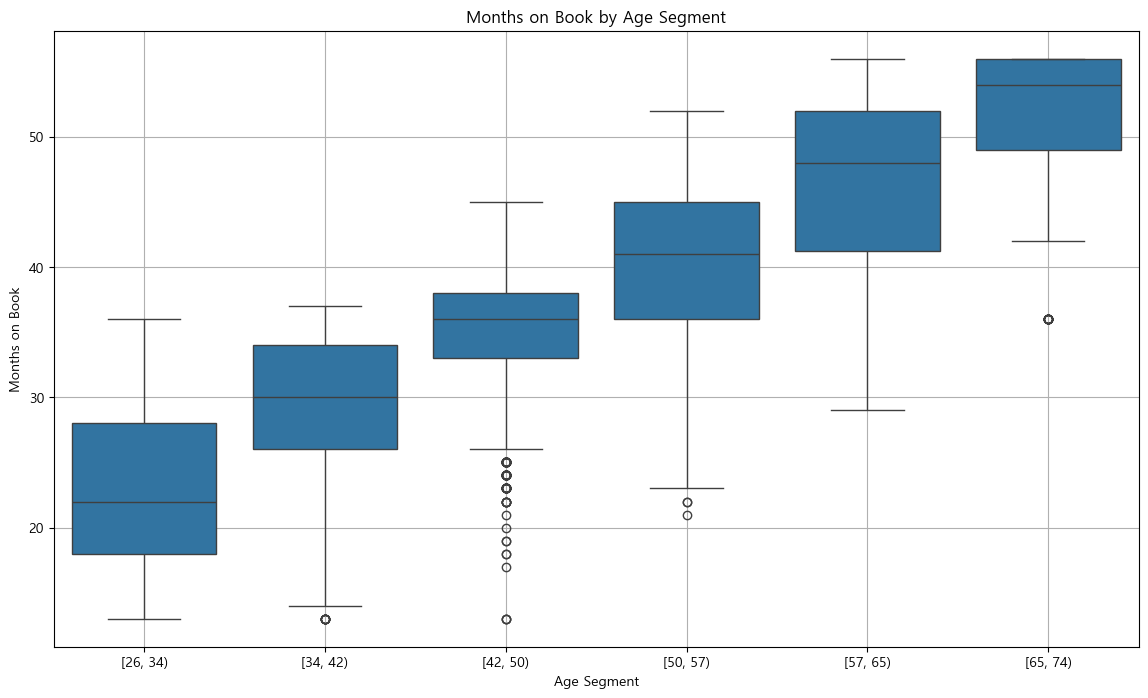

In [34]:





#data['Age_Segment'] = pd.cut(data['Customer_Age'], bins=[26, 34, 42, 50, 57, 65, 74], right=False)

# 나이 세그먼트별로 Months_on_book 통계량 계산
segment_months_on_book = data.groupby('Age_Segment')['Months_on_book'].describe()

# 통계량 출력
print(segment_months_on_book)

# 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age_Segment', y='Months_on_book', data=data)
plt.title('Months on Book by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Months on Book')
plt.grid(True)
plt.show()


In [35]:
#age_under65=data['Customer_Age']<=65
#d1=data.loc[age_under65]

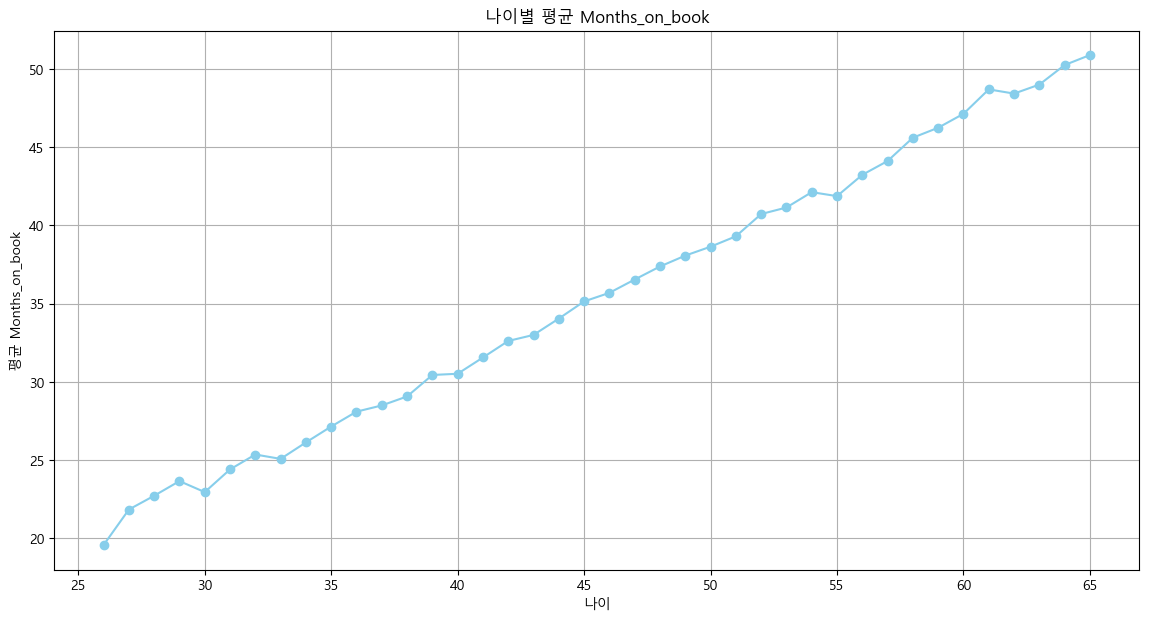

In [36]:
# 나이별로 Months_on_book의 평균을 계산
age_avg_Months_on_book = d1.groupby('Customer_Age')['Months_on_book'].mean()

# 시각화
plt.figure(figsize=(14, 7))
age_avg_Months_on_book.plot(kind='line', marker='o', color='skyblue')
plt.title('나이별 평균 Months_on_book')
plt.xlabel('나이')
plt.ylabel('평균 Months_on_book')
plt.grid(True)
#plt.xticks(data['Customer_Age'])

# 그래프 출력
plt.show()

In [105]:
data['Age_Segment'].value_counts()

Age_Segment
[42, 50)    3821
[50, 57)    2461
[34, 42)    2187
[57, 65)     958
[26, 34)     589
[65, 74)     111
Name: count, dtype: int64

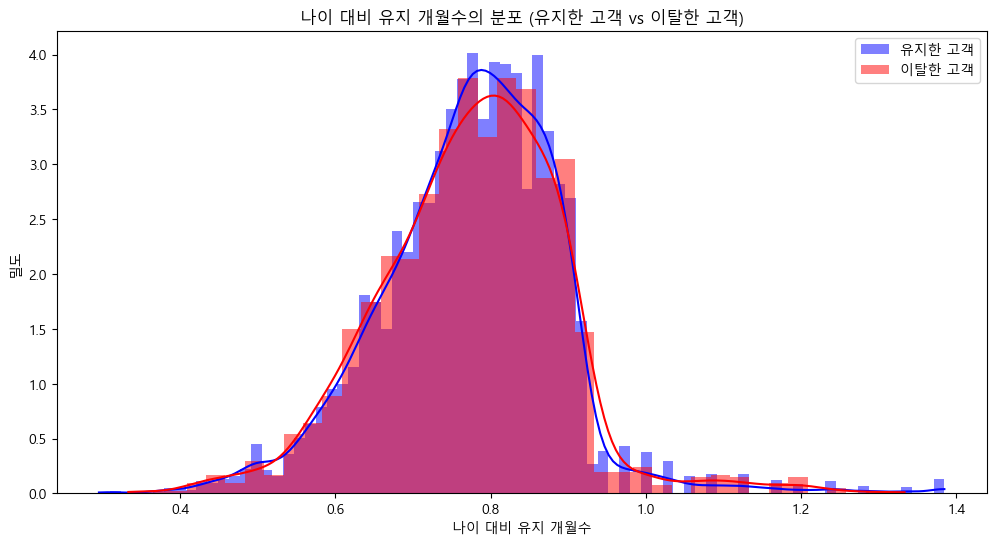

,Attrition_Flag,mean,std
0,0,0.775437,0.117714
1,1,0.775289,0.116608


In [37]:

data['Age_Months_Ratio'] = data['Months_on_book'] / data['Customer_Age']

# 고객 이탈 여부에 따른 나이 대비 유지 개월수의 분포를 확인
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Attrition_Flag'] == 1]['Age_Months_Ratio'], color='blue', label='유지한 고객', kde=True, stat="density", linewidth=0)
sns.histplot(data[data['Attrition_Flag'] == 0]['Age_Months_Ratio'], color='red', label='이탈한 고객', kde=True, stat="density", linewidth=0)

plt.title('나이 대비 유지 개월수의 분포 (유지한 고객 vs 이탈한 고객)')
plt.xlabel('나이 대비 유지 개월수')
plt.ylabel('밀도')
plt.legend()
plt.show()

# 나이 대비 유지 개월수의 평균과 표준편차를 확인
grouped_data = data.groupby('Attrition_Flag')['Age_Months_Ratio'].agg(['mean', 'std']).reset_index()
#import ace_tools as tools; tools.display_dataframe_to_user(name="Age to Months on Book Ratio Analysis", dataframe=grouped_data)

grouped_data



나이 대비 유지 개월수(Age to Months on Book Ratio)를 기준으로 고객의 이탈 여부를 분석한 결과:

이탈한 고객의 평균 나이 대비 유지 개월수는 약 0.7754이며, 표준편차는 약 0.1177
유지한 고객의 평균 나이 대비 유지 개월수는 약 0.7753이며, 표준편차는 약 0.1166
시각화에서도 볼 수 있듯이, 나이 대비 유지 개월수 분포는 이탈한 고객과 유지한 고객 사이에 큰 차이가 없다

이 결과로 볼 때, 나이 대비 유지 개월수는 고객의 이탈 여부를 예측하는 데 중요한 요인으로 작용하지 않을 가능성이 높다


C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\182860427.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segment_analysis = data.groupby(['Age_Segment', 'Attrition_Flag'])['Months_on_book'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

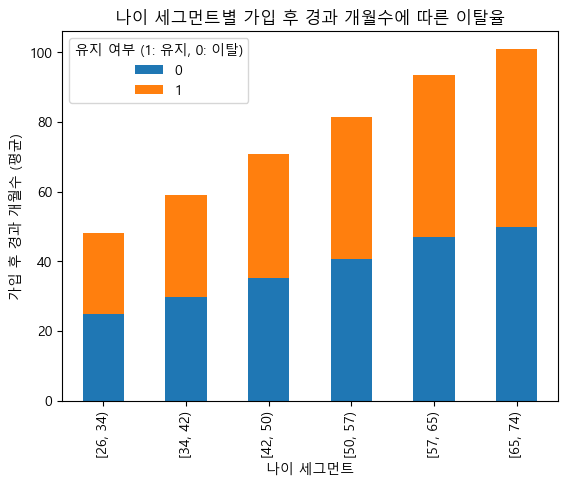

In [38]:


# 나이 세그먼트별 가입 후 경과 개월 수에 따른 이탈율 계산
age_segment_analysis = data.groupby(['Age_Segment', 'Attrition_Flag'])['Months_on_book'].mean().unstack()

# 시각화
plt.figure(figsize=(12, 6))
age_segment_analysis.plot(kind='bar', stacked=True)
plt.title('나이 세그먼트별 가입 후 경과 개월수에 따른 이탈율')
plt.xlabel('나이 세그먼트')
plt.ylabel('가입 후 경과 개월수 (평균)')
plt.legend(title='유지 여부 (1: 유지, 0: 이탈)')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_3272\3137851125.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_months_on_book = data.groupby('Age_Segment')['Months_on_book'].describe()
C:\Users\Dell\AppData\Local\Temp\ipykernel_3272\3137851125.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = data.groupby('Age_Segment')['Months_on_book'].mean()


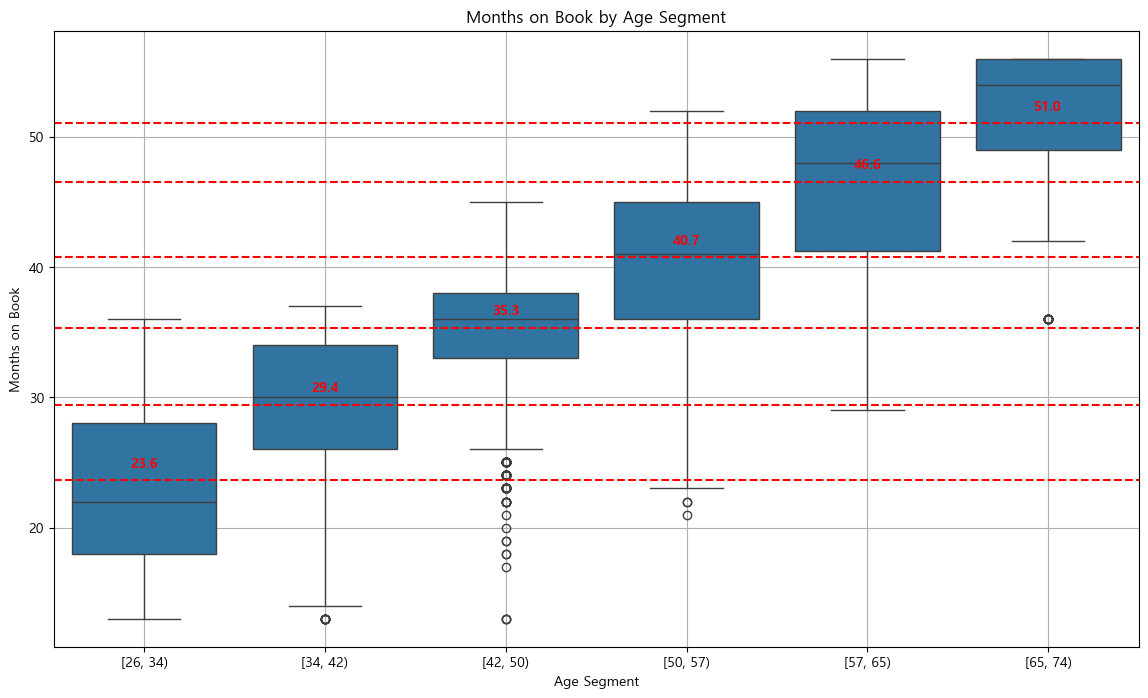

In [106]:
# 나이 세그먼트별로 Months_on_book 통계량 계산
segment_months_on_book = data.groupby('Age_Segment')['Months_on_book'].describe()

# 통계량 출력
segment_months_on_book

# 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age_Segment', y='Months_on_book', data=data)
plt.title('Months on Book by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Months on Book')
plt.grid(True)

# 나이 세그먼트별로 평균값 표시
means = data.groupby('Age_Segment')['Months_on_book'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 1, f'{mean:.1f}', ha='center', color='red', weight='bold')
    plt.axhline(mean, color='red', linestyle='--')

plt.show()


....나이 다시 나눠야하나......................

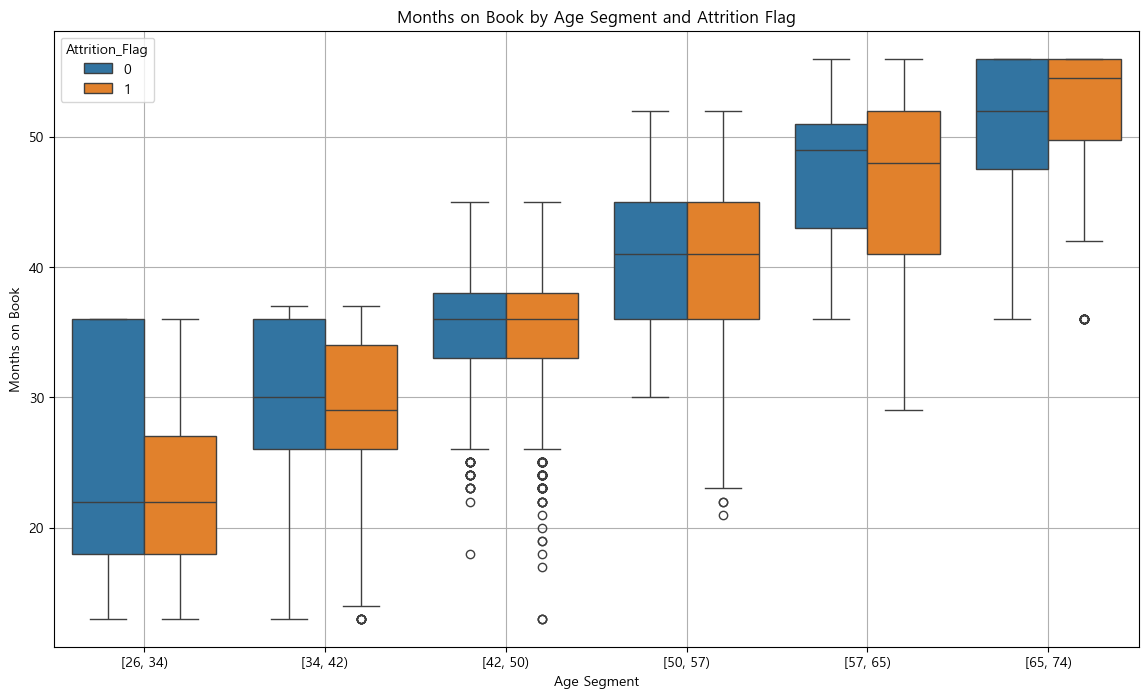

In [107]:
# 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age_Segment', y='Months_on_book', hue='Attrition_Flag', data=data)
plt.title('Months on Book by Age Segment and Attrition Flag')
plt.xlabel('Age Segment')
plt.ylabel('Months on Book')
plt.grid(True)
#plt.legend(title='Attrition Flag (1: 유지, 0: 이탈)')
plt.show()


In [48]:
data[data['Age_Segment'].isnull()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Num,Marital_Status_Num,Income_Category_Num,Card_Category_Num,Age_Segment,Age_Months_Ratio


C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\3454134093.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segment_means = data.groupby('Age_Segment')['Months_on_book'].mean()


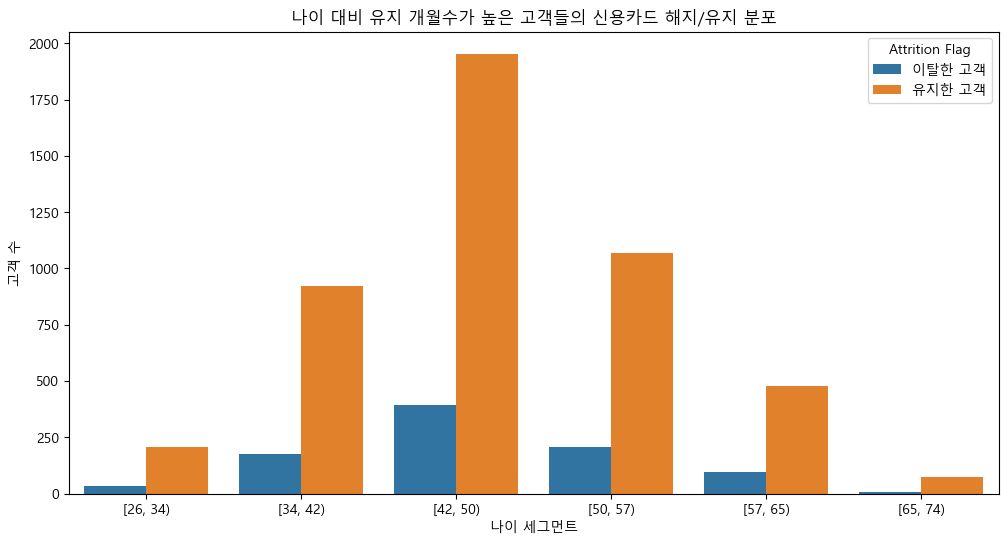

In [39]:
# NaN 값을 처리하기 위해 Age_Segment에서 NaN 값을 확인하고 제외한 다음 분석을 진행합니다.
#data = data.dropna(subset=['Age_Segment'])

# 나이 세그먼트별 Months_on_book의 평균값 구하기
age_segment_means = data.groupby('Age_Segment')['Months_on_book'].mean()

# 나이 대비 유지 개월수가 높은 고객 필터링
data['High_Age_Months'] = data.apply(lambda x: 1 if x['Months_on_book'] > age_segment_means[x['Age_Segment']] else 0, axis=1)

# 나이 대비 유지 개월수가 높은 고객들에 대한 이탈/유지 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Segment', hue='Attrition_Flag', data=data[data['High_Age_Months'] == 1])

plt.title('나이 대비 유지 개월수가 높은 고객들의 신용카드 해지/유지 분포')
plt.xlabel('나이 세그먼트')
plt.ylabel('고객 수')
plt.legend(title='Attrition Flag', labels=['이탈한 고객', '유지한 고객'])
plt.show()


평균을 기준으로 계산 ..? 각 세그먼트별 Months_on_book 이 평균이상인 고객을  나이대비 유지율이 높은고객이라고 칭한다

C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\1983861046.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segment_means = data.groupby('Age_Segment')['Months_on_book'].mean()


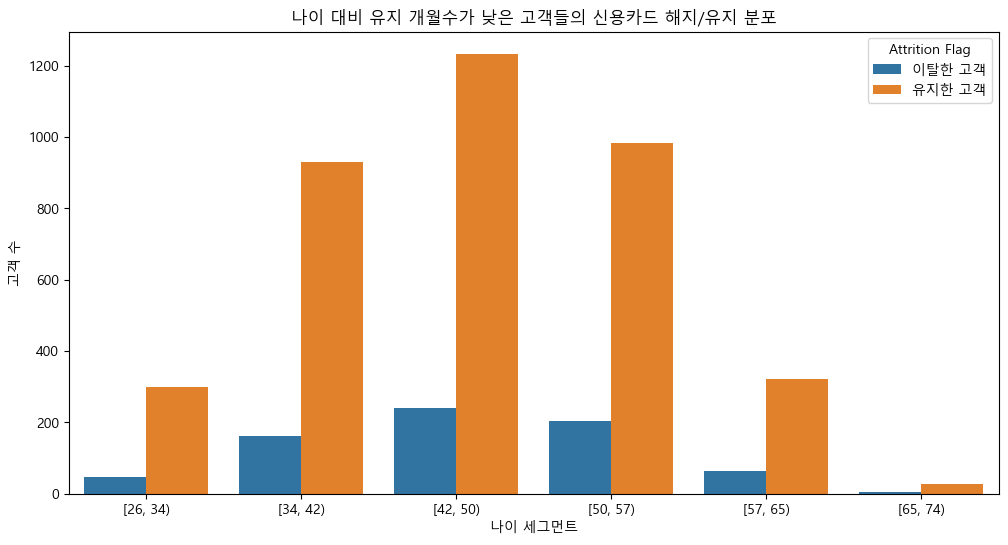

In [40]:


age_segment_means = data.groupby('Age_Segment')['Months_on_book'].mean()


data['High_Age_Months'] = data.apply(lambda x: 1 if x['Months_on_book'] < age_segment_means[x['Age_Segment']] else 0, axis=1)


plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Segment', hue='Attrition_Flag', data=data[data['High_Age_Months'] == 1])

plt.title('나이 대비 유지 개월수가 낮은 고객들의 신용카드 해지/유지 분포')
plt.xlabel('나이 세그먼트')
plt.ylabel('고객 수')
plt.legend(title='Attrition Flag', labels=['이탈한 고객', '유지한 고객'])
plt.show()

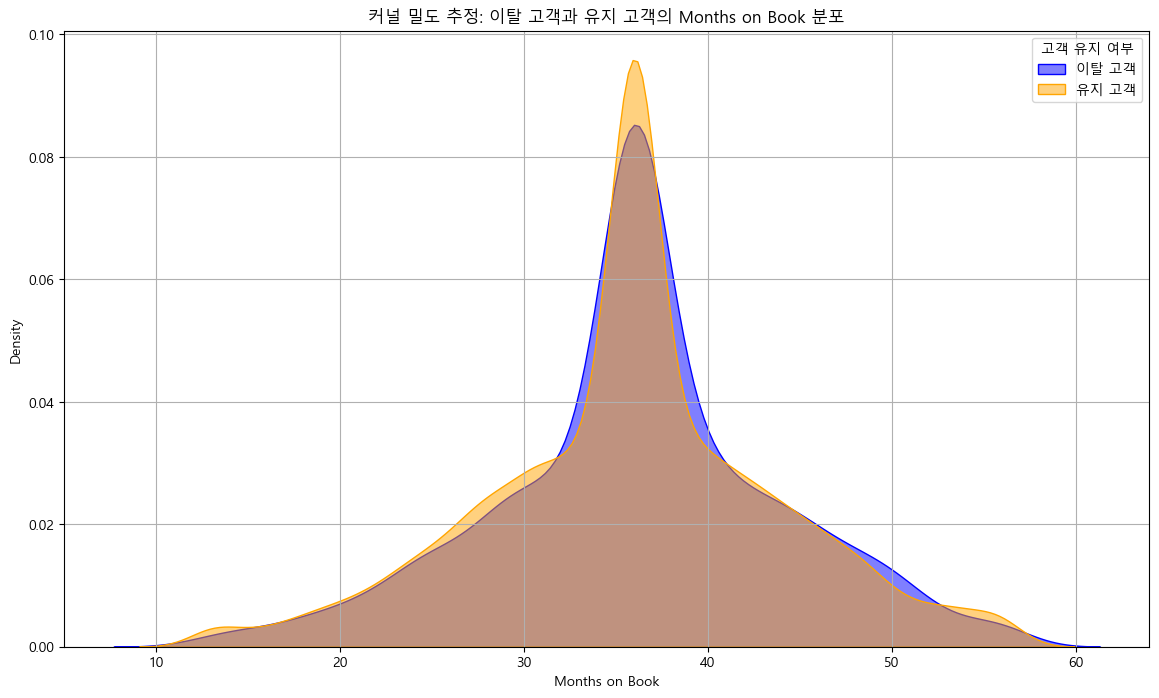

In [42]:


# 나이 세그먼트 추가
#data['Age_Segment'] = pd.cut(data['Customer_Age'], bins=[26, 34, 42, 50, 57, 65, 73], right=False)

# 커널 밀도 추정 그래프 그리기
plt.figure(figsize=(14, 8))

# 이탈 고객 (Attrition_Flag = 0)
sns.kdeplot(data=data[data['Attrition_Flag'] == 0], x='Months_on_book', label='이탈 고객', fill=True, alpha=0.5, color='blue')

# 유지 고객 (Attrition_Flag = 1)
sns.kdeplot(data=data[data['Attrition_Flag'] == 1], x='Months_on_book', label='유지 고객', fill=True, alpha=0.5, color='orange')

plt.title('커널 밀도 추정: 이탈 고객과 유지 고객의 Months on Book 분포')
plt.xlabel('Months on Book')
plt.ylabel('Density')
plt.legend(title='고객 유지 여부')
plt.grid(True)
plt.show()

35개월
 시점에 고객 데이터~ 

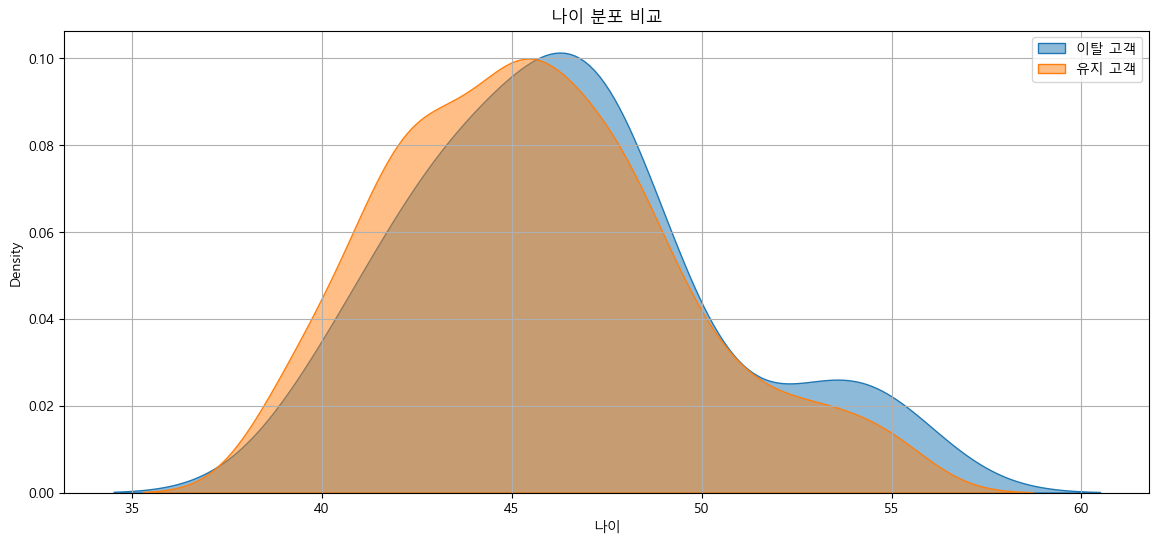

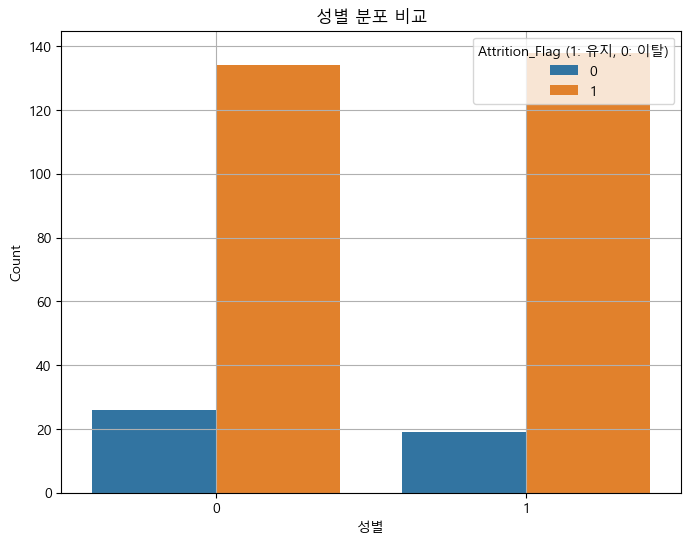

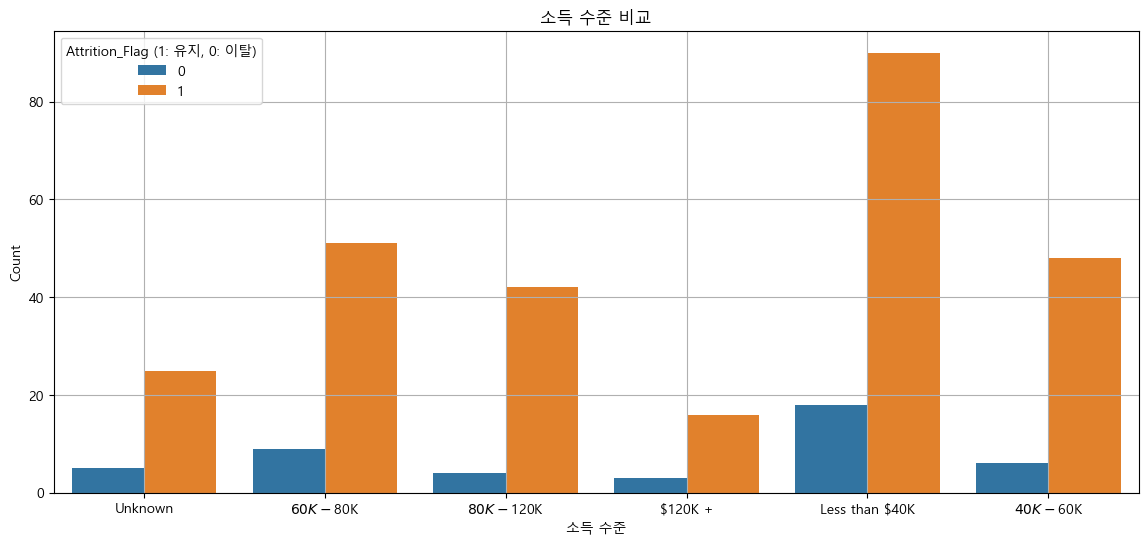

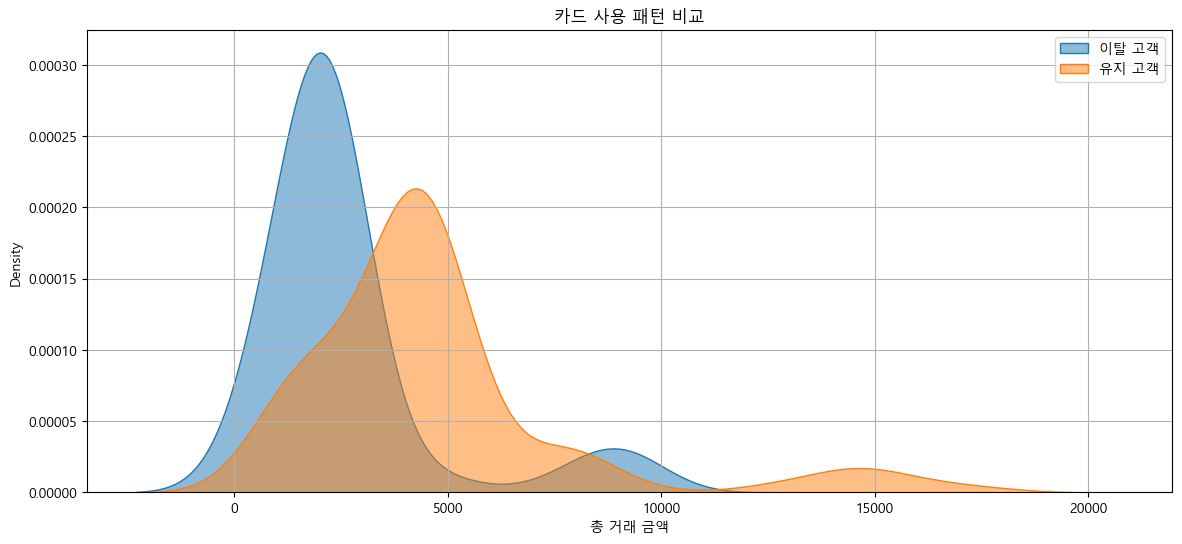

In [35]:

# 35개월 시점의 고객 데이터 추출
data_35_months = data[data['Months_on_book'] == 35]

# 35개월 시점의 이탈 고객과 유지 고객 구분
data_35_months_attrited = data_35_months[data_35_months['Attrition_Flag'] == 0]
data_35_months_retained = data_35_months[data_35_months['Attrition_Flag'] == 1]

# 1. 나이 분포 비교
plt.figure(figsize=(14, 6))
sns.kdeplot(data=data_35_months_attrited, x='Customer_Age', label='이탈 고객', fill=True, alpha=0.5)
sns.kdeplot(data=data_35_months_retained, x='Customer_Age', label='유지 고객', fill=True, alpha=0.5)
plt.title('나이 분포 비교')
plt.xlabel('나이')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# 2. 성별 분포 비교
plt.figure(figsize=(8, 6))
sns.countplot(data=data_35_months, x='Gender', hue='Attrition_Flag')
plt.title('성별 분포 비교')
plt.xlabel('성별')
plt.ylabel('Count')
plt.legend(title='Attrition_Flag (1: 유지, 0: 이탈)')
plt.grid(True)
plt.show()

# 3. 소득 수준 비교
plt.figure(figsize=(14, 6))
sns.countplot(data=data_35_months, x='Income_Category', hue='Attrition_Flag')
plt.title('소득 수준 비교')
plt.xlabel('소득 수준')
plt.ylabel('Count')
plt.legend(title='Attrition_Flag (1: 유지, 0: 이탈)')
plt.grid(True)
plt.show()

# 4. 카드 사용 패턴 비교 (예: Total_Trans_Amt)
plt.figure(figsize=(14, 6))
sns.kdeplot(data=data_35_months_attrited, x='Total_Trans_Amt', label='이탈 고객', fill=True, alpha=0.5)
sns.kdeplot(data=data_35_months_retained, x='Total_Trans_Amt', label='유지 고객', fill=True, alpha=0.5)
plt.title('카드 사용 패턴 비교')
plt.xlabel('총 거래 금액')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


나이별 소객 소득 수준 알아내기


C:\Users\Dell\AppData\Local\Temp\ipykernel_3272\3462141341.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_segment = data.groupby(['Age_Segment', 'Income_Category']).size().unstack()


<Figure size 1400x800 with 0 Axes>

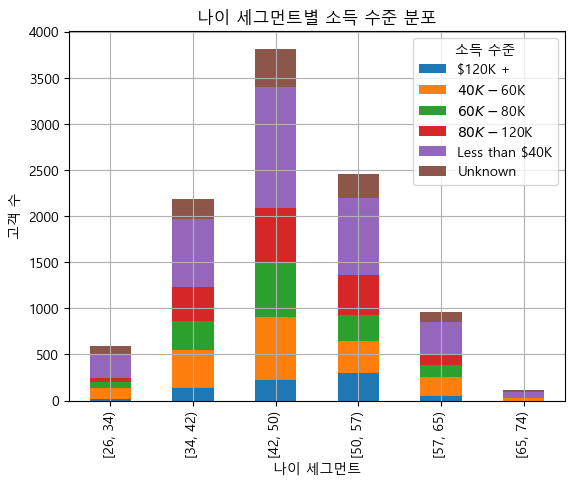

In [108]:


# 나이 세그먼트 추가
data['Age_Segment'] = pd.cut(data['Customer_Age'], bins=[26, 34, 42, 50, 57, 65, 74], right=False)

# 나이 세그먼트별 소득 수준 분포 분석
income_by_age_segment = data.groupby(['Age_Segment', 'Income_Category']).size().unstack()

# 나이 세그먼트별 소득 수준 분포 시각화
plt.figure(figsize=(14, 8))
income_by_age_segment.plot(kind='bar', stacked=True)
plt.title('나이 세그먼트별 소득 수준 분포')
plt.xlabel('나이 세그먼트')
plt.ylabel('고객 수')
plt.legend(title='소득 수준')
plt.grid(True)
plt.show()


Income_Category    $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Age_Segment                                                          
[26, 34)          3.056027    20.373514    11.205433      7.470289   
[34, 42)          6.127115    18.930041    14.494742     16.643804   
[42, 50)          5.862340    17.901073    15.702696     15.336299   
[50, 57)         12.068265    14.018692    11.661926     17.635108   
[57, 65)          5.636743    20.876827    13.778706     11.169102   
[65, 74)          0.000000    24.324324     0.000000      0.000000   

Income_Category  Less than $40K    Unknown  
Age_Segment                                 
[26, 34)              42.784380  15.110357  
[34, 42)              33.882030   9.922268  
[42, 50)              34.336561  10.861031  
[50, 57)              34.010565  10.605445  
[57, 65)              37.369520  11.169102  
[65, 74)              54.954955  20.720721  


C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\13321596.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_segment = data.groupby(['Age_Segment', 'Income_Category']).size().unstack()


<Figure size 1400x800 with 0 Axes>

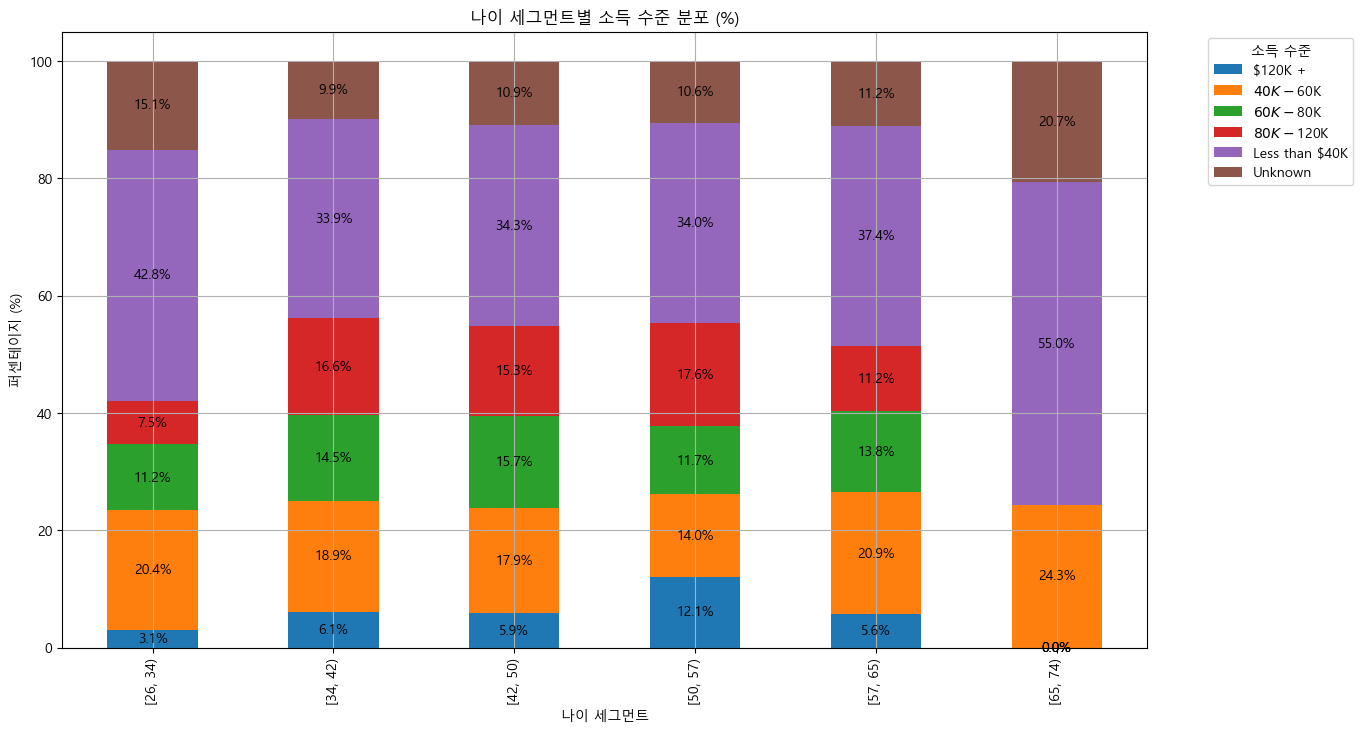

In [43]:



# 나이 세그먼트별 소득 수준 분포 분석
income_by_age_segment = data.groupby(['Age_Segment', 'Income_Category']).size().unstack()

# 퍼센테이지 계산
income_by_age_segment_percentage = income_by_age_segment.div(income_by_age_segment.sum(axis=1), axis=0) * 100

# 데이터 프레임 확인
print(income_by_age_segment_percentage)

# 시각화
plt.figure(figsize=(14, 8))
ax = income_by_age_segment_percentage.plot(kind='bar', stacked=True, figsize=(14, 8))

# 퍼센테이지 라벨 추가
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, '{:.1f}%'.format(height), ha='center', va='center')

plt.title('나이 세그먼트별 소득 수준 분포 (%)')
plt.xlabel('나이 세그먼트')
plt.ylabel('퍼센테이지 (%)')
plt.legend(title='소득 수준', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Attrition_Flag     0     1  Retention_Rate
Income_Category                           
$120K +          126   601       82.668501
$40K - $60K      271  1519       84.860335
$60K - $80K      189  1213       86.519258
$80K - $120K     242  1293       84.234528
Less than $40K   612  2949       82.813816
Unknown          187   925       83.183453


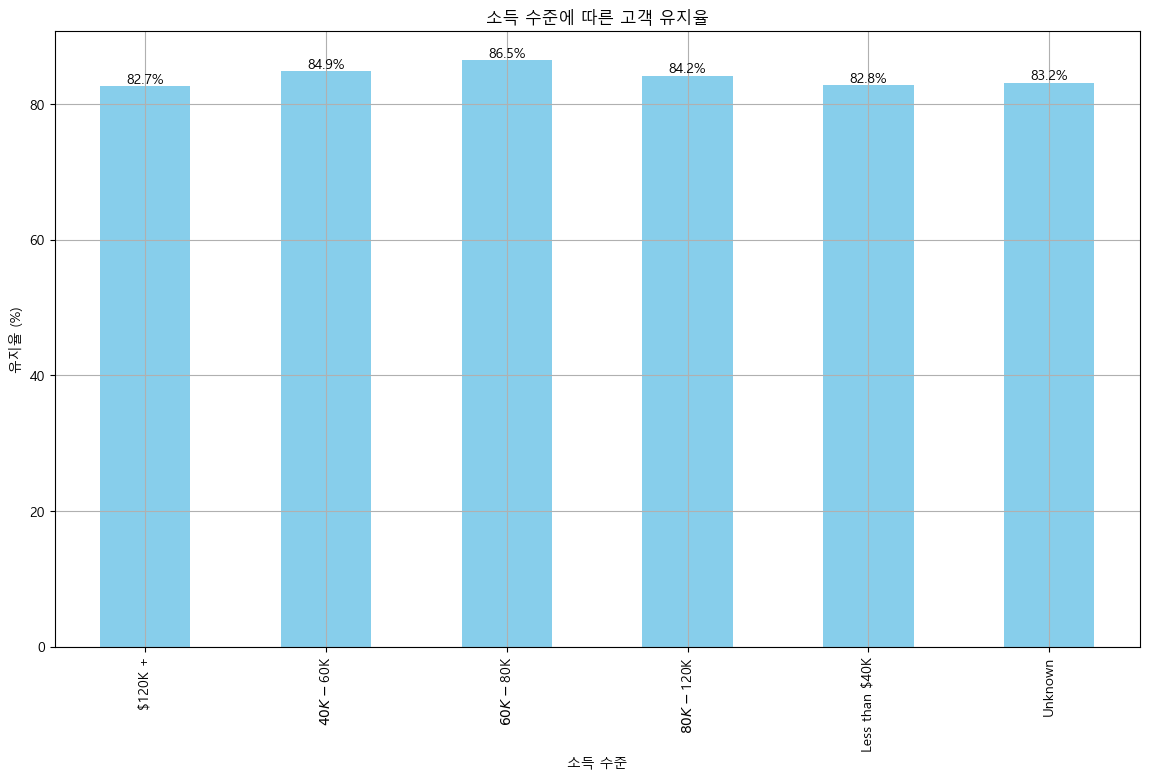

In [44]:

# 소득 수준별 이탈 고객과 유지 고객 수 계산
income_attrition = data.groupby(['Income_Category', 'Attrition_Flag']).size().unstack()

# 유지율 계산
income_attrition['Retention_Rate'] = (income_attrition[1] / (income_attrition[0] + income_attrition[1])) * 100

# 데이터 프레임 확인
print(income_attrition)

# 시각화
plt.figure(figsize=(14, 8))
ax = income_attrition['Retention_Rate'].plot(kind='bar', color='skyblue')

# 퍼센테이지 라벨 추가
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, '{:.1f}%'.format(height), ha='center', va='bottom')

plt.title('소득 수준에 따른 고객 유지율')
plt.xlabel('소득 수준')
plt.ylabel('유지율 (%)')
plt.grid(True)
plt.show()


나이가 많다면 한도 대비 사용 금액이 적을 것이다.\
한도대비사용금액= 12개월간 총거래금액(Total_Trans_Amt) / 신용카드한도*12(Credit_Limit)

In [45]:
age_segment_total_trans_amt = data.groupby('Age_Segment')['Total_Trans_Amt'].mean()
age_segment_total_trans_amt.value_counts()

C:\Users\Dell\AppData\Local\Temp\ipykernel_26268\358536146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segment_total_trans_amt = data.groupby('Age_Segment')['Total_Trans_Amt'].mean()


Total_Trans_Amt
4909.521222    1
4235.283493    1
4627.917561    1
4349.702154    1
3930.506263    1
2635.981982    1
Name: count, dtype: int64

나이별...세그먼트 다시해야할ㄷ,ㅅ.....


In [80]:
age_under65=data['Customer_Age']<=65
d1=data.loc[age_under65]
d1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Num,Marital_Status_Num,Income_Category_Num,Card_Category_Num,Age_Segment,Age_Months_Ratio,High_Age_Months,Utilization_Ratio
0,768805383,1,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,2,2,3,0,"[42, 50)",0.866667,0,0.007512
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,4,1,1,0,"[42, 50)",0.897959,0,0.013031
2,713982108,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,4,2,2,0,"[50, 57)",0.705882,1,0.046006
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,2,0,1,0,"[34, 42)",0.850000,0,0.029455
4,709106358,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,1,2,3,0,"[34, 42)",0.525000,1,0.014419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,Graduate,Single,$40K - $60K,Blue,40,...,0.857,0.462,4,1,4,0,"[50, 57)",0.800000,1,0.322175
10123,710638233,0,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0.683,0.511,0,3,4,0,"[34, 42)",0.609756,1,0.170758
10124,716506083,0,44,0,1,High School,Married,Less than $40K,Blue,36,...,0.818,0.000,2,2,1,0,"[42, 50)",0.818182,0,0.158547
10125,717406983,0,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0.722,0.000,4,0,4,0,"[26, 34)",1.200000,0,0.132472


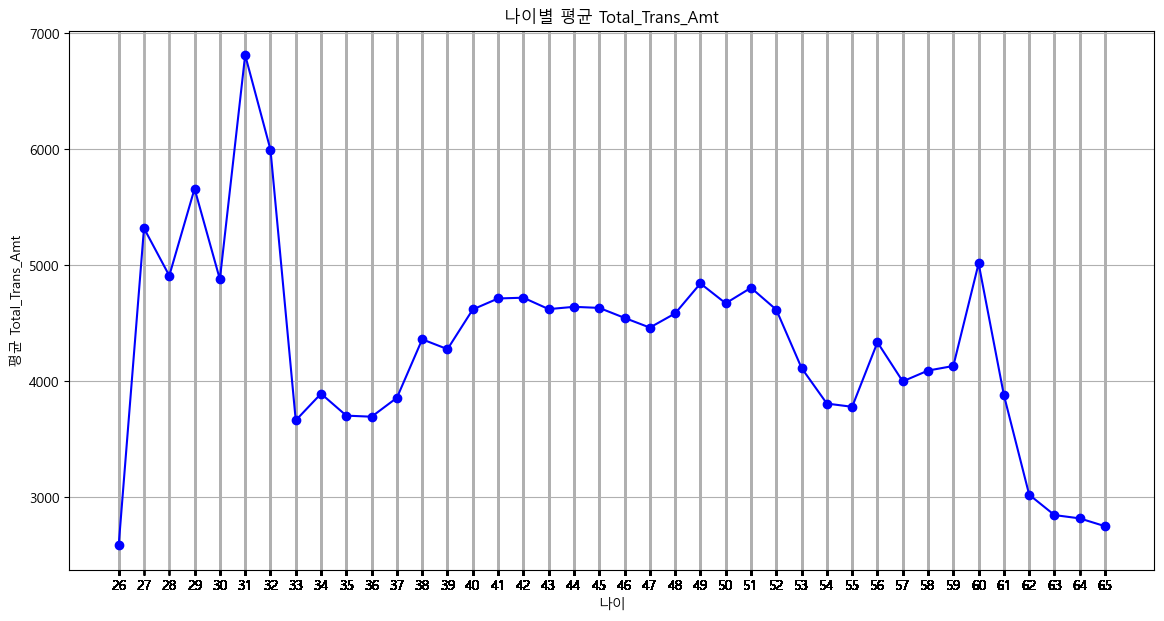

In [84]:
# 나이별로 Total_Trans_Amt의 평균을 계산
age_avg_trans_amt = d1.groupby('Customer_Age')['Total_Trans_Amt'].mean()

# 시각화
plt.figure(figsize=(14, 7))
age_avg_trans_amt.plot(kind='line', marker='o', color='blue')
plt.title('나이별 평균 Total_Trans_Amt')
plt.xlabel('나이')
plt.ylabel('평균 Total_Trans_Amt')
plt.grid(True)
plt.xticks(d1['Customer_Age'])

# 그래프 출력
plt.show()


유독 31-32 부근에서 치솟은 이유가 무엇?\
이 이유때문에 26-34 segment 의 12개월간 소득량이 늘어남

In [141]:
#married_d=data['Marital_Status']=='Married'
#df = data[married_d]


In [143]:

'''age_married = data.groupby('Customer_Age')['Marital_Status'].count()

# 시각화
plt.figure(figsize=(14, 7))
age_married.plot(kind='line', marker='o', color='blue')
plt.title('나이별 결혼상태')
plt.xlabel('나이')
plt.ylabel('상태')
plt.grid(True)
#plt.xticks(df['Customer_Age'])

# 그래프 출력
plt.show()'''

"age_married = data.groupby('Customer_Age')['Marital_Status'].count()\n\n# 시각화\nplt.figure(figsize=(14, 7))\nage_married.plot(kind='line', marker='o', color='blue')\nplt.title('나이별 결혼상태')\nplt.xlabel('나이')\nplt.ylabel('상태')\nplt.grid(True)\n#plt.xticks(df['Customer_Age'])\n\n# 그래프 출력\nplt.show()"

C:\Users\Dell\AppData\Local\Temp\ipykernel_3272\3306864543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_avg_trans_amt = d1.groupby('Age_Segment')['Total_Trans_Amt'].mean()


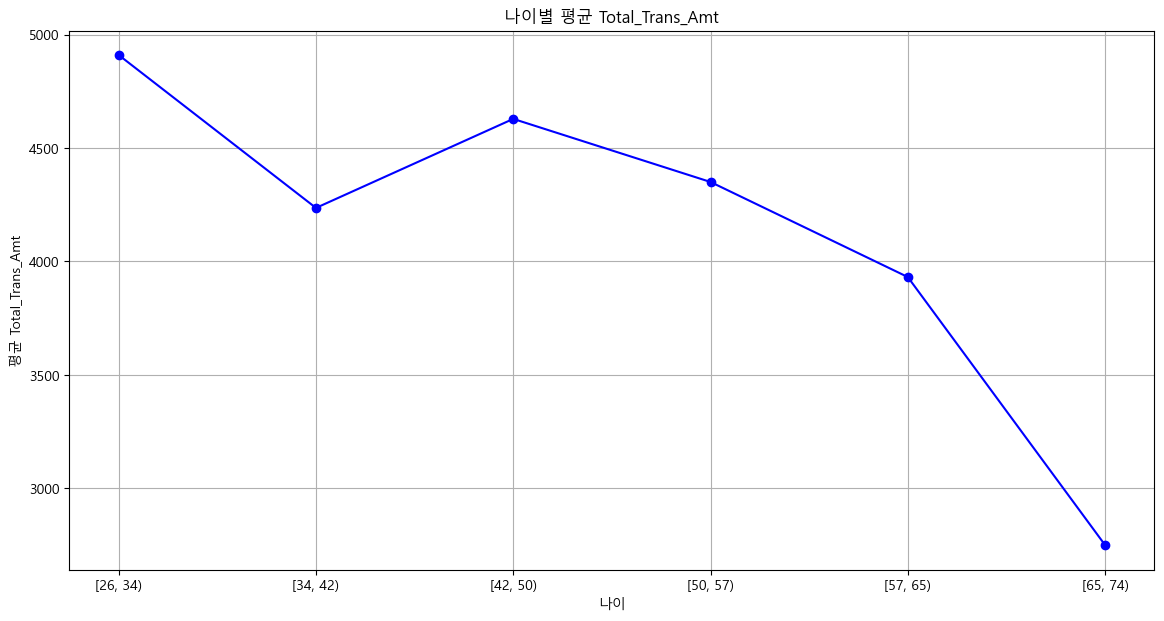

In [121]:
# 나이별로 Total_Trans_Amt의 평균을 계산
age_avg_trans_amt = d1.groupby('Age_Segment')['Total_Trans_Amt'].mean()

# 시각화
plt.figure(figsize=(14, 7))
age_avg_trans_amt.plot(kind='line', marker='o', color='blue')
plt.title('나이별 평균 Total_Trans_Amt')
plt.xlabel('나이')
plt.ylabel('평균 Total_Trans_Amt')
plt.grid(True)
#plt.xticks(d1['Customer_Age'])

# 그래프 출력
plt.show()


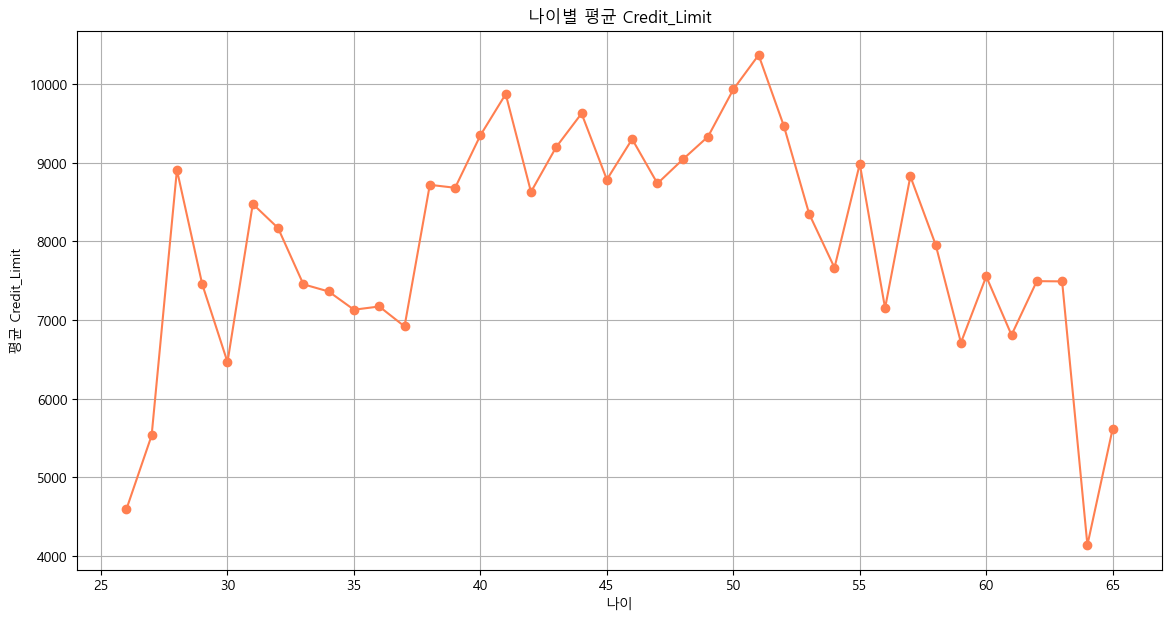

In [89]:
# 나이별로 Credit_Limit의 평균을 계산
age_avg_credit_limit = d1.groupby('Customer_Age')['Credit_Limit'].mean()

# 시각화
plt.figure(figsize=(14, 7))
age_avg_credit_limit.plot(kind='line', marker='o', color='coral')
plt.title('나이별 평균 Credit_Limit')
plt.xlabel('나이')
plt.ylabel('평균 Credit_Limit')
plt.grid(True)

# 그래프 출력
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_3272\2953624941.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_avg_credit_limit = d1.groupby('Age_Segment')['Credit_Limit'].mean()


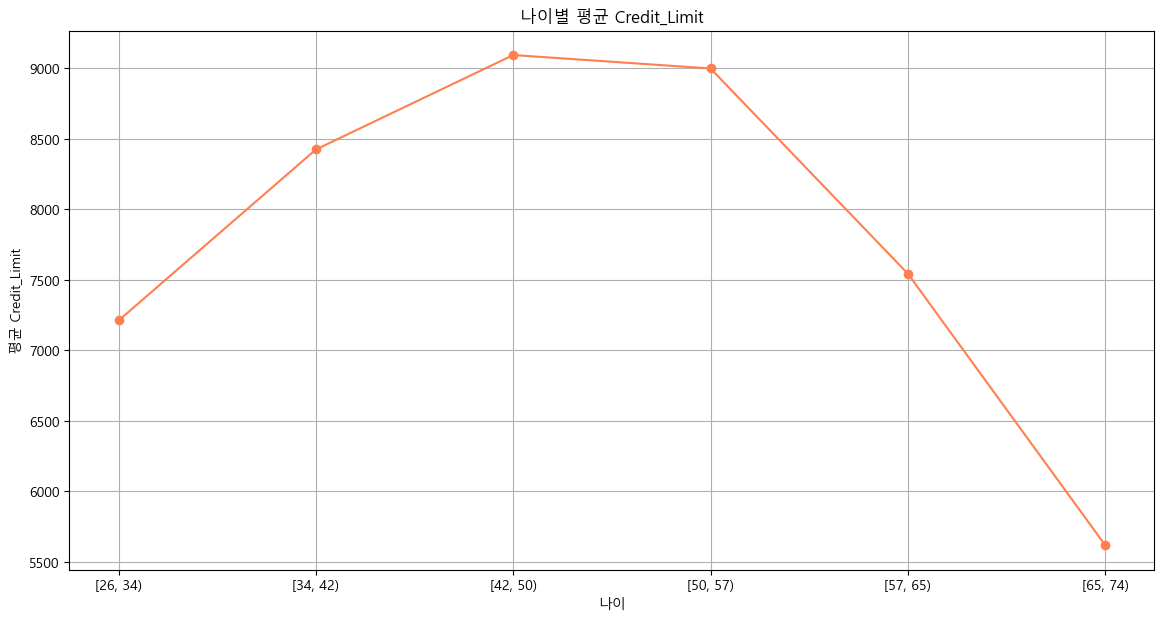

In [119]:
# 나이별로 Credit_Limit의 평균을 계산
age_avg_credit_limit = d1.groupby('Age_Segment')['Credit_Limit'].mean()

# 시각화
plt.figure(figsize=(14, 7))
age_avg_credit_limit.plot(kind='line', marker='o', color='coral')
plt.title('나이별 평균 Credit_Limit')
plt.xlabel('나이')
plt.ylabel('평균 Credit_Limit')
plt.grid(True)

# 그래프 출력
plt.show()

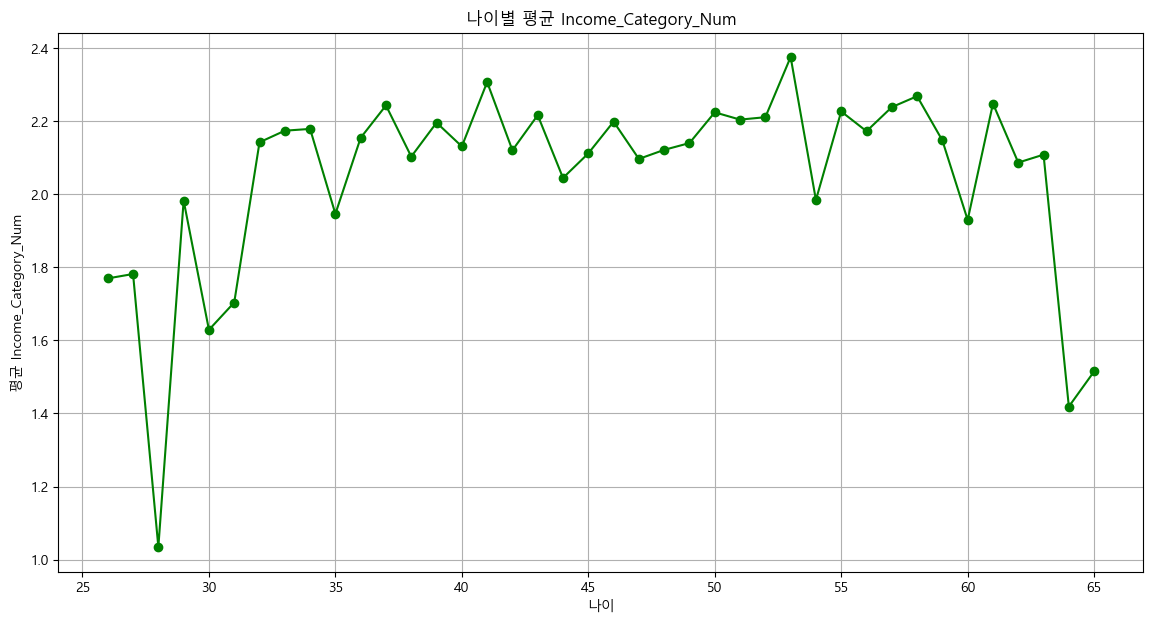

In [91]:
# 나이별로 Income_Category_Num의 평균을 계산
age_avg_income_category_num = d1.groupby('Customer_Age')['Income_Category_Num'].mean()

# 시각화
plt.figure(figsize=(14, 7))
age_avg_income_category_num.plot(kind='line', marker='o', color='green')
plt.title('나이별 평균 Income_Category_Num')
plt.xlabel('나이')
plt.ylabel('평균 Income_Category_Num')
#plt.xticks(d1['Customer_Age'])
plt.grid(True)

# 그래프 출력
plt.show()


In [88]:
age_over65=data['Customer_Age']>65
d2=data.loc[age_over65]
d2['Customer_Age'].value_counts()
# 개수가 10개밖에 안됨

Customer_Age
67    4
66    2
68    2
73    1
70    1
Name: count, dtype: int64

Customer_Age
26    0.076309
27    0.114358
28    0.083329
29    0.100982
30    0.093182
31    0.108091
32    0.101539
33    0.085721
34    0.086011
35    0.089015
36    0.075974
37    0.088003
38    0.086047
39    0.083650
40    0.088691
41    0.084220
42    0.095021
43    0.087828
44    0.084687
45    0.093499
46    0.089202
47    0.091765
48    0.088403
49    0.091541
50    0.085744
51    0.085847
52    0.093405
53    0.081223
54    0.078620
55    0.079874
56    0.089102
57    0.081352
58    0.084211
59    0.086500
60    0.092644
61    0.078000
62    0.060000
63    0.058643
64    0.074833
65    0.064487
66    0.029292
67    0.031922
68    0.027759
70    0.031442
73    0.032912
Name: creditlimit_to_total, dtype: float64


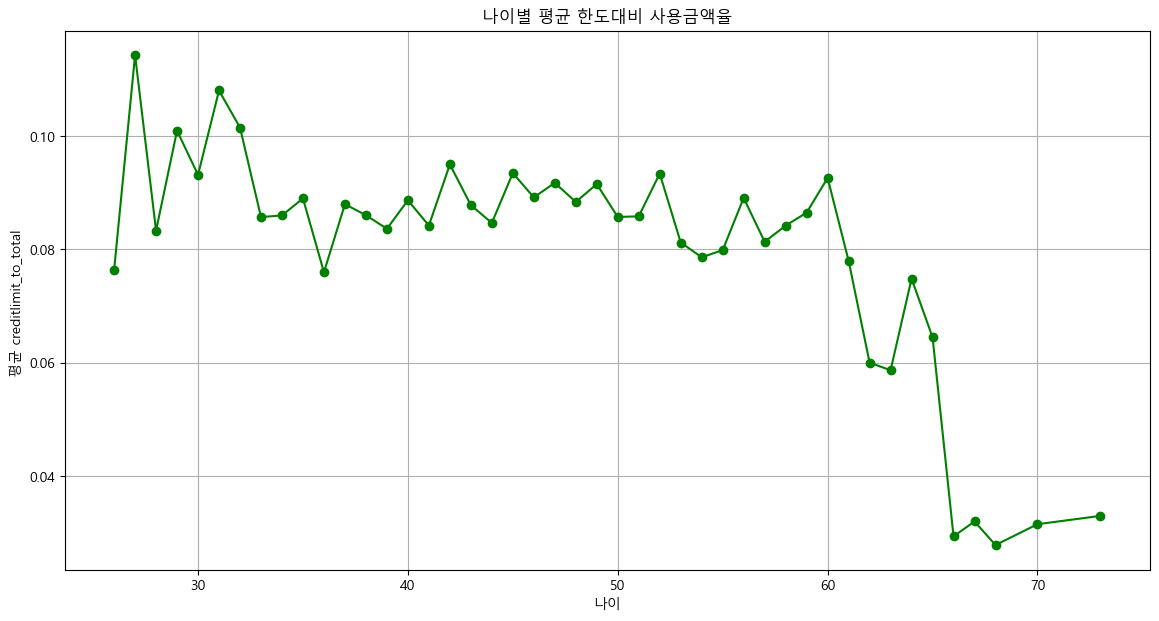

In [115]:
# 한도 대비 사용 금액 지표 계산
data['creditlimit_to_total'] = data['Total_Trans_Amt'] / (data['Credit_Limit'] * 12)

# 나이 세그먼트별 한도 대비 사용 금액 지표의 평균값 구하기
age_segment_utilization = data.groupby('Customer_Age')['creditlimit_to_total'].mean()
print(age_segment_utilization)
# 시각화
plt.figure(figsize=(14, 7))
age_segment_utilization.plot(kind='line', marker='o', color='green')
plt.title('나이별 평균 한도대비 사용금액율')
plt.xlabel('나이')
plt.ylabel('평균 creditlimit_to_total ')
#plt.xticks(d1['Customer_Age'])
plt.grid(True)

# 그래프 출력
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3272\3596359729.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segment_utilization = data.groupby('Age_Segment')['creditlimit_to_total'].mean()


Age_Segment
[26, 34)    0.094553
[34, 42)    0.085264
[42, 50)    0.090162
[50, 57)    0.085024
[57, 65)    0.079930
[65, 74)    0.061436
Name: creditlimit_to_total, dtype: float64


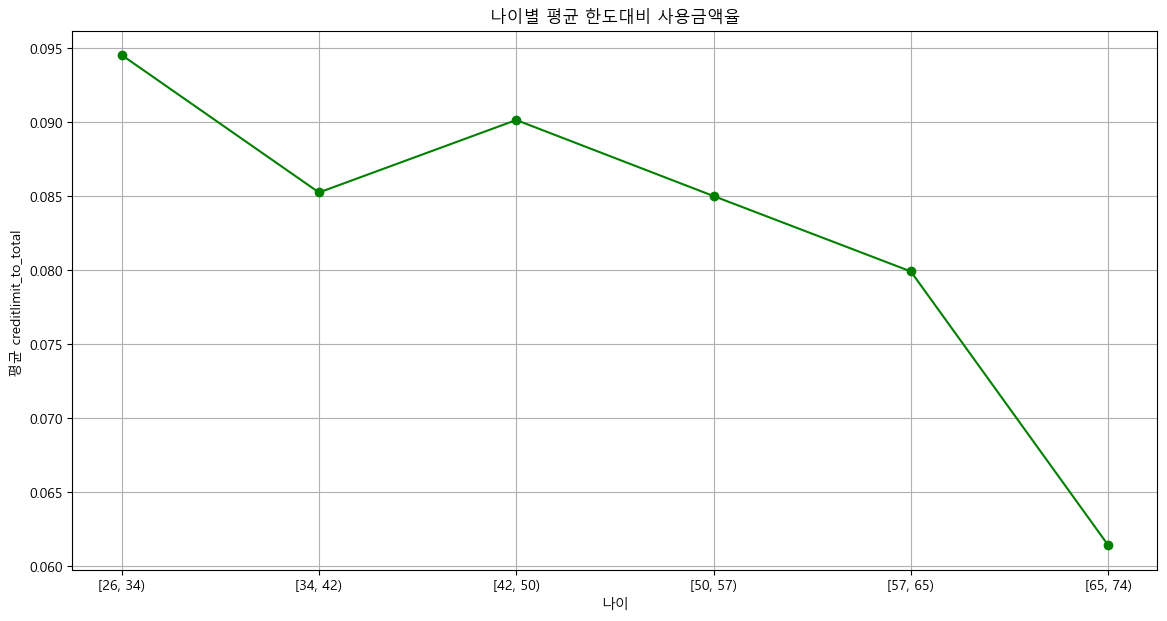

In [118]:
# 한도 대비 사용 금액 지표 계산
data['creditlimit_to_total'] = data['Total_Trans_Amt'] / (data['Credit_Limit'] * 12)

# 나이 세그먼트별 한도 대비 사용 금액 지표의 평균값 구하기
age_segment_utilization = data.groupby('Age_Segment')['creditlimit_to_total'].mean()
print(age_segment_utilization)
# 시각화
plt.figure(figsize=(14, 7))
age_segment_utilization.plot(kind='line', marker='o', color='green')
plt.title('나이별 평균 한도대비 사용금액율')
plt.xlabel('나이')
plt.ylabel('평균 creditlimit_to_total ')
#plt.xticks(d1['Customer_Age'])
plt.grid(True)

# 그래프 출력
plt.show()

Gender 관련 인사이트 도출


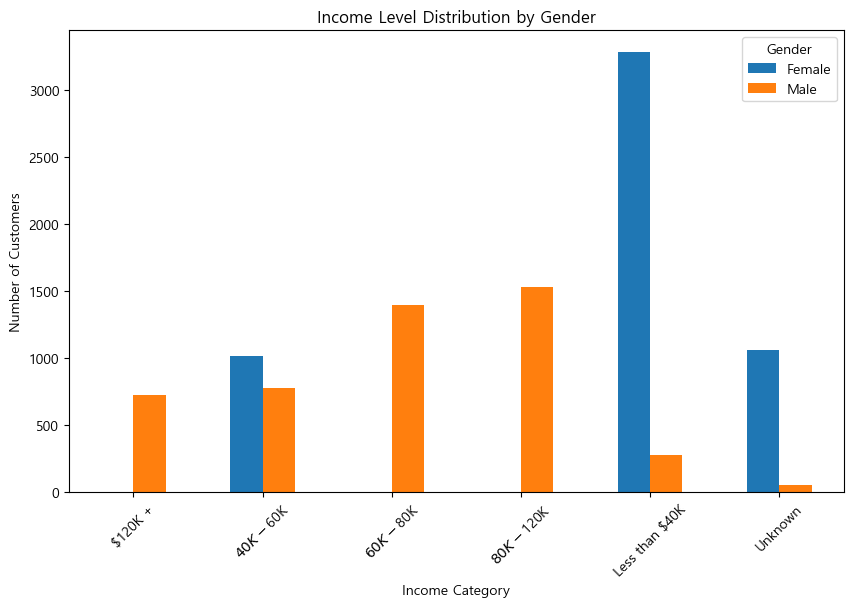

In [52]:


# 성별과 소득 수준을 그룹화하여 분포를 계산
income_gender_dist = data.groupby(['Income_Category', 'Gender']).size().unstack().fillna(0)

# 소득 수준별 성별 분포 시각화
income_gender_dist.plot(kind='bar',stacked=False, figsize=(10, 6))
plt.title('Income Level Distribution by Gender')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.legend(['Female', 'Male'], title='Gender')
plt.xticks(rotation=45)
plt.show()


각 성별이 특정 소득 범주에 얼마나 분포되어 있는 지 시각화 
- 모든 소득 수준에서 남성고객 수가 여성고객 수보다 많다. \
- 특히 40-60 60-80 범주에 여성어디갔..? /...? ...? ....?????????

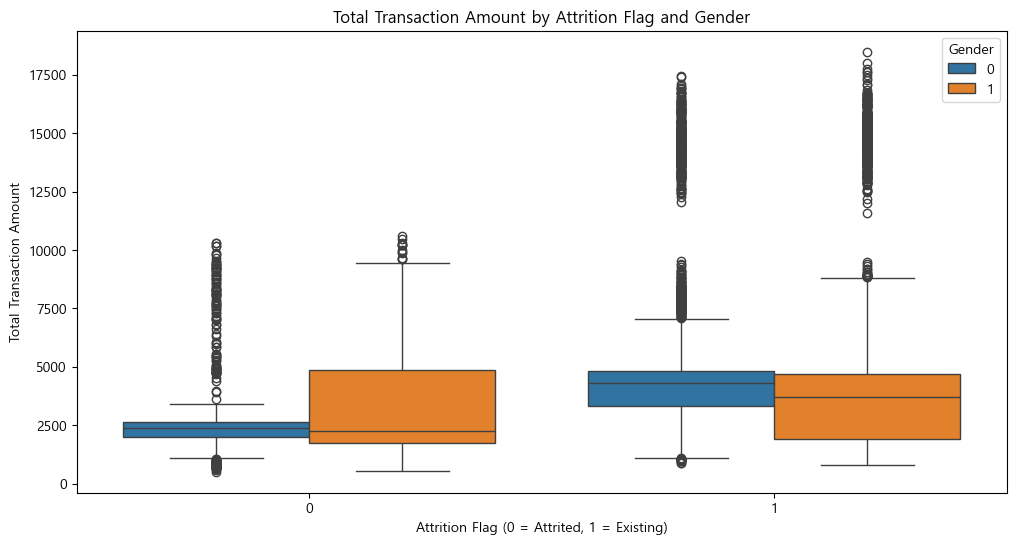

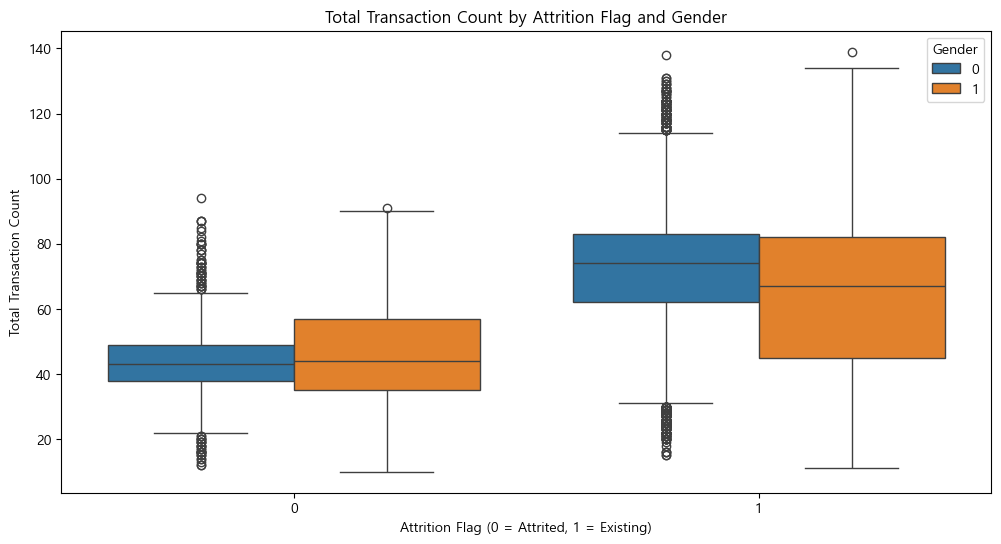

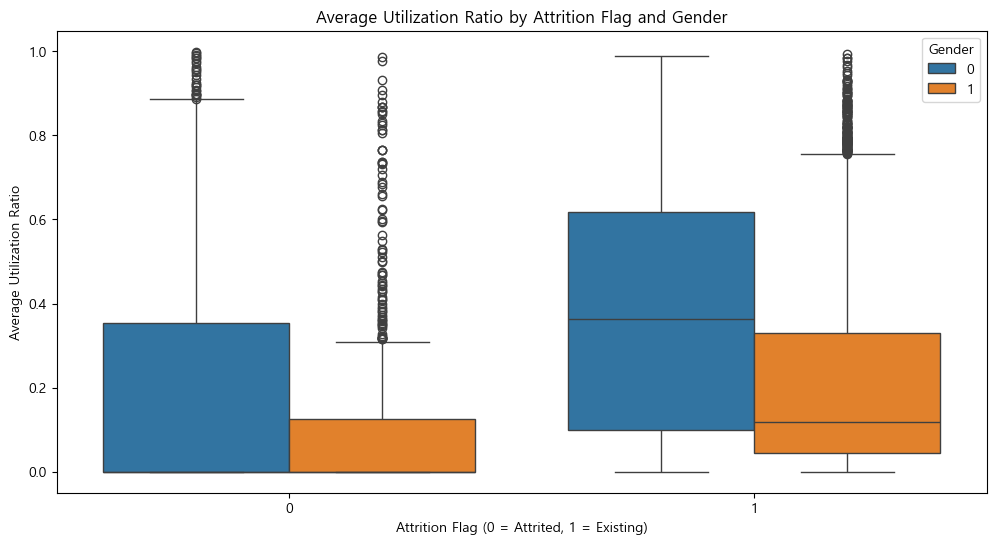

In [55]:


# 이탈율과 Total_Trans_Amt 간의 관계 시각화 12개월 총 거래량
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Attrition_Flag', y='Total_Trans_Amt', hue='Gender')
plt.title('Total Transaction Amount by Attrition Flag and Gender')
plt.xlabel('Attrition Flag (0 = Attrited, 1 = Existing)')
plt.ylabel('Total Transaction Amount')
plt.legend(title='Gender')
plt.show()

# 이탈율과 Total_Trans_Ct 간의 관계 시각화 12개월 총거래건수
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Attrition_Flag', y='Total_Trans_Ct', hue='Gender')
plt.title('Total Transaction Count by Attrition Flag and Gender')
plt.xlabel('Attrition Flag (0 = Attrited, 1 = Existing)')
plt.ylabel('Total Transaction Count')
plt.legend(title='Gender')
plt.show()

# 이탈율과 Avg_Utilization_Ratio 간의 관계 시각화   평균잔액대비 신용한도
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Attrition_Flag', y='Avg_Utilization_Ratio', hue='Gender')
plt.title('Average Utilization Ratio by Attrition Flag and Gender')
plt.xlabel('Attrition Flag (0 = Attrited, 1 = Existing)')
plt.ylabel('Average Utilization Ratio')
plt.legend(title='Gender')
plt.show()


12개월간 총거래금액 
- 이탈고객은 유지고객보다 총거래금액이 낮은경향
- 남성 여성 모두에게 관찰 

12개월간 총 거래 건수
- 이탈고객은 유지고객보다 총거래횟수가 적다 
- 여성고객의 경우, 이탈고객의 총 거래 횟수가 더욱 두드러지게 적다. 

평균 잔액대비 신용한도 
- 이탈고객은 유지고객보다 잔액대비 신용한도가 낮은 경향이 있다. 
- 남성과 여성 모두에게 관찰되며, 특히 여성고객에게서 더 뚜렷하게 나타난다. 

In [5]:
data['Dependent_count'].describe()

count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64

부양가족수 Dependent_count

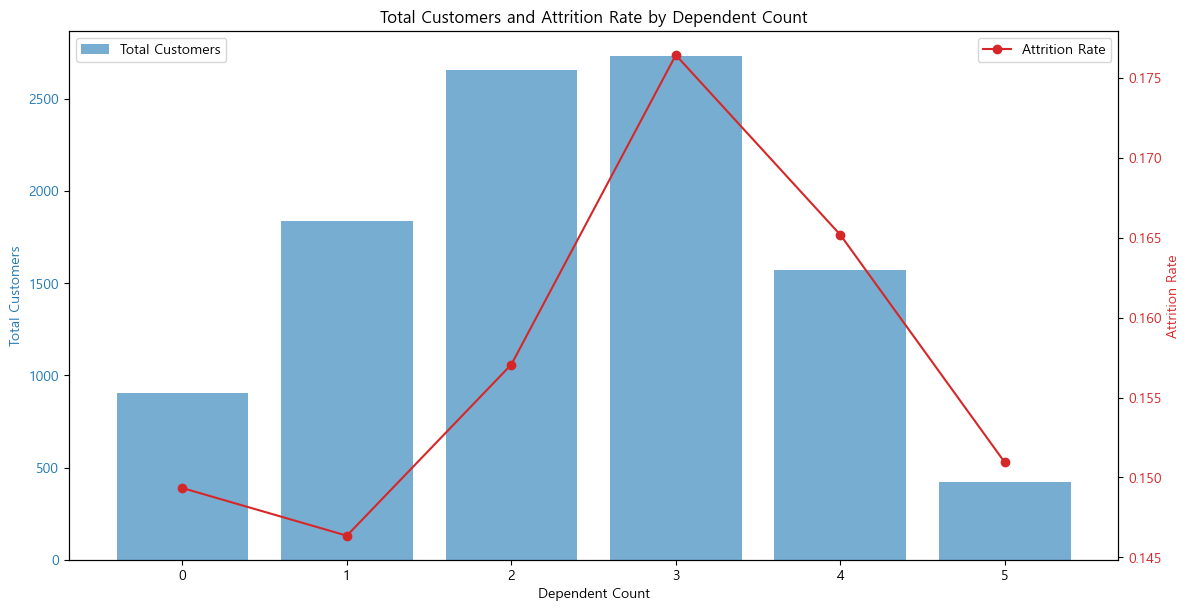

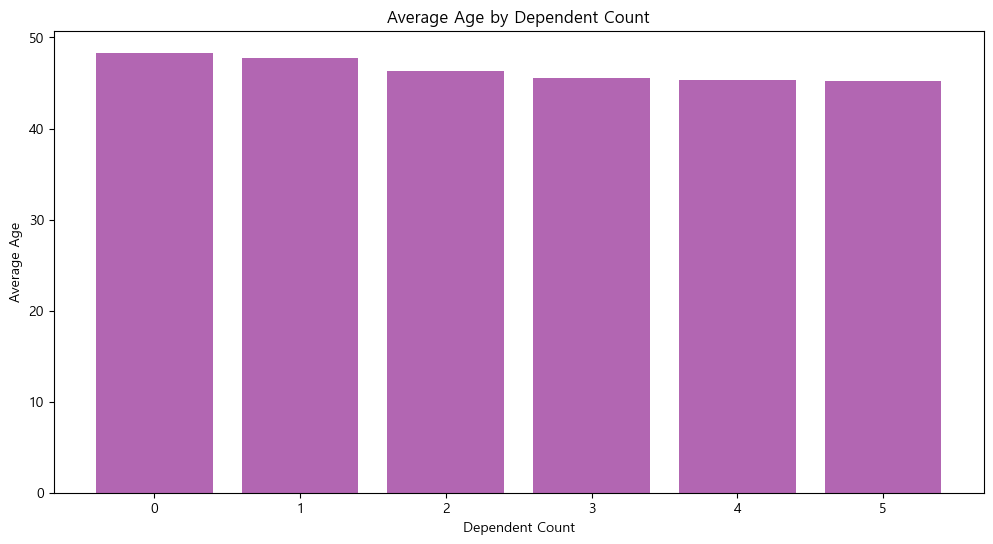

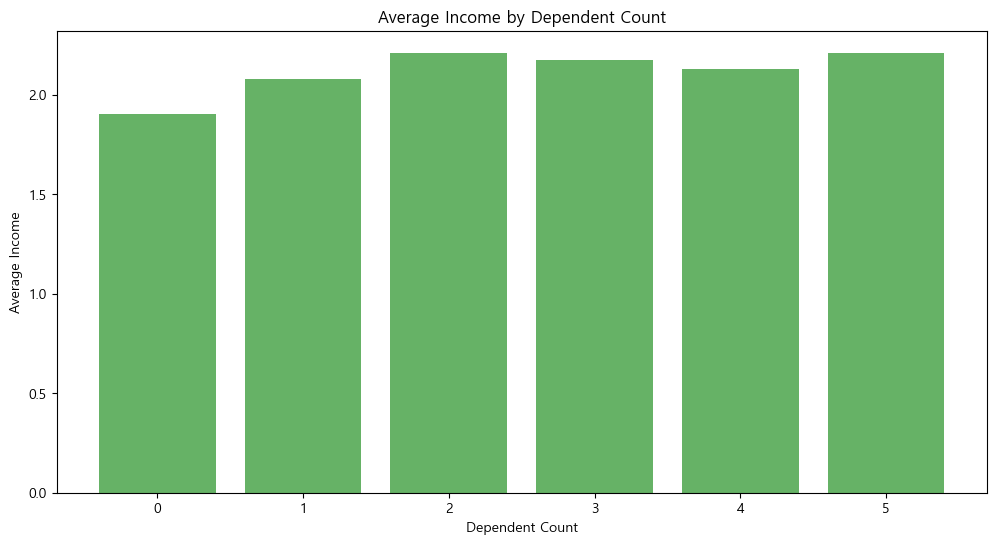

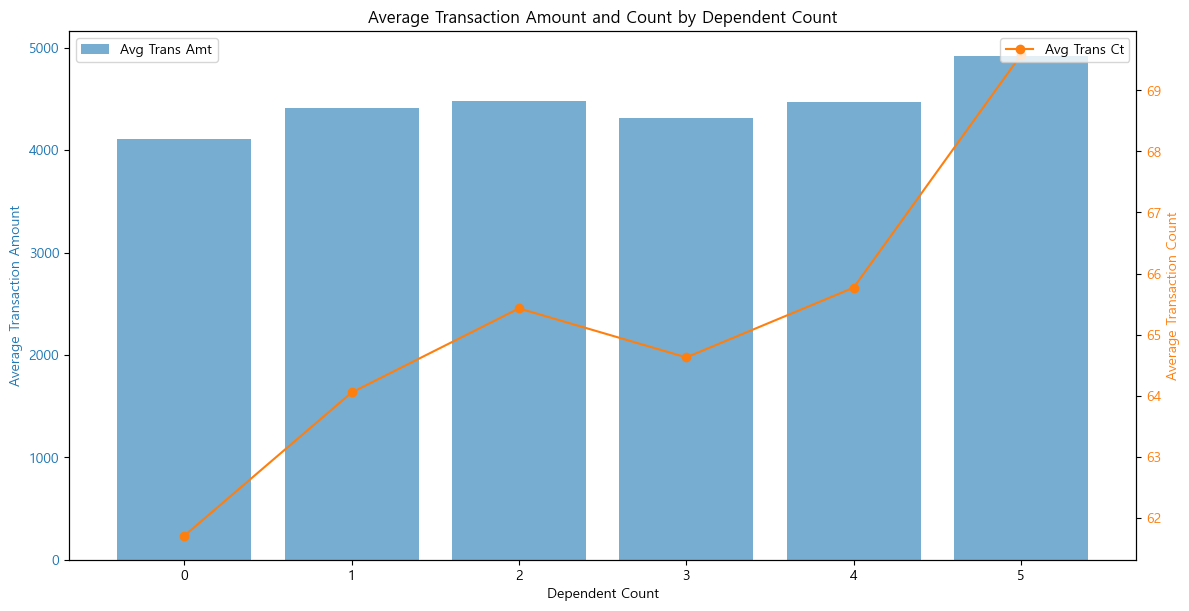

In [56]:
# 각 부양가족 수별 고객 수와 이탈율을 계산
dependent_analysis = data.groupby('Dependent_count').agg(
    total_customers=pd.NamedAgg(column='CLIENTNUM', aggfunc='count'),
    attrition_rate=pd.NamedAgg(column='Attrition_Flag', aggfunc=lambda x: 1 - x.mean())
).reset_index()

# 각 부양가족 수별 평균 고객 나이 계산
dependent_age_analysis = data.groupby('Dependent_count').agg(
    avg_age=pd.NamedAgg(column='Customer_Age', aggfunc='mean')
).reset_index()

dependent_age_analysis



# 각 부양가족 수별 평균 소득 계산
dependent_income_analysis = data.groupby('Dependent_count').agg(
    avg_income=pd.NamedAgg(column='Income_Category_Num', aggfunc='mean')
).reset_index()

dependent_income_analysis


# 각 부양가족 수별 평균 거래 금액과 평균 거래 횟수 계산
dependent_transaction_analysis = data.groupby('Dependent_count').agg(
    avg_trans_amt=pd.NamedAgg(column='Total_Trans_Amt', aggfunc='mean'),
    avg_trans_ct=pd.NamedAgg(column='Total_Trans_Ct', aggfunc='mean')
).reset_index()

dependent_transaction_analysis


# 각 부양가족 수별 고객 수와 이탈율 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Dependent Count')
ax1.set_ylabel('Total Customers', color=color)
ax1.bar(dependent_analysis['Dependent_count'], dependent_analysis['total_customers'], color=color, alpha=0.6, label='Total Customers')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Attrition Rate', color=color)
ax2.plot(dependent_analysis['Dependent_count'], dependent_analysis['attrition_rate'], color=color, marker='o', label='Attrition Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Total Customers and Attrition Rate by Dependent Count')
plt.show()

# 각 부양가족 수별 평균 고객 나이 시각화
plt.figure(figsize=(12, 6))
plt.bar(dependent_age_analysis['Dependent_count'], dependent_age_analysis['avg_age'], color='purple', alpha=0.6)
plt.title('Average Age by Dependent Count')
plt.xlabel('Dependent Count')
plt.ylabel('Average Age')
plt.show()

# 각 부양가족 수별 평균 소득 시각화
plt.figure(figsize=(12, 6))
plt.bar(dependent_income_analysis['Dependent_count'], dependent_income_analysis['avg_income'], color='green', alpha=0.6)
plt.title('Average Income by Dependent Count')
plt.xlabel('Dependent Count')
plt.ylabel('Average Income')
plt.show()

# 각 부양가족 수별 평균 거래 금액과 거래 횟수 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Dependent Count')
ax1.set_ylabel('Average Transaction Amount', color=color)
ax1.bar(dependent_transaction_analysis['Dependent_count'], dependent_transaction_analysis['avg_trans_amt'], color=color, alpha=0.6, label='Avg Trans Amt')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average Transaction Count', color=color)
ax2.plot(dependent_transaction_analysis['Dependent_count'], dependent_transaction_analysis['avg_trans_ct'], color=color, marker='o', label='Avg Trans Ct')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Average Transaction Amount and Count by Dependent Count')
plt.show()


1. 이탈율
- 부양 가족 수가 3명일때 이탈율이 가장 높았으며 (17.6%) 1명일때 이탈율이 가장 낮다. (14.6%) 
- 부양가족수가 2명일때 , 3명일때 totalcustomers 자는 2655, 2732 로 비슷하지만 이탈율은 확연한 차이가 보인다  왜? 
- 45그룹은 count 수가 작으니 ! 

2. 평균고객나이
- 부양가족 수가 적을 수록 평균 나이가 높다. 부양가족이 없는 고객의 평균나이는 48.33, 부양가족이 5명인 고객의평균나이는 45.26 .. .-> 나이가 들면 자식들은 독립하고 부양가족이 없어질듯 ?

3. 부양가족수가 많을수록 평균 소득
- 부양가족수가 많아질수록 평균 소득도 약간 증가하는 추세. 이것도 2번 3번... 왜.?

4. 부양가족 수별 평균 거래금액과 거래횟수
-파란색 막대는 각 부양가족 수별 평균 거래 금액이며 주황색 선 그래프는 평균 거래 횟수. 
- 부양가족 수가 많을 수록 평균 거래 금액과 거래 횟수가 증가하는 경향을 보인다 .

둘 차이를 봤을때 평균 거래 금액과 평균 거래 횟수가 부양가족 2명인 그룹에서 더 높게 나타난다. .. \
거래 패턴 분석을 해보면 좋을듯 ?


1. 2번 3번 고액거래와 저액래의 빈도 분석 
거래 기준 : 상위 25%  하위: 25% 


In [58]:
group_2 = data[data['Dependent_count'] == 2]
group_3 = data[data['Dependent_count'] == 3]

# 고액 거래와 저액 거래의 기준 설정 (상위 25%와 하위 25%)
high_value_threshold = data['Total_Trans_Amt'].quantile(0.75)
low_value_threshold = data['Total_Trans_Amt'].quantile(0.25)

# 고액 거래와 저액 거래 빈도 계산
group_2_high_value = group_2[group_2['Total_Trans_Amt'] > high_value_threshold].shape[0]
group_2_low_value = group_2[group_2['Total_Trans_Amt'] < low_value_threshold].shape[0]
group_3_high_value = group_3[group_3['Total_Trans_Amt'] > high_value_threshold].shape[0]
group_3_low_value = group_3[group_3['Total_Trans_Amt'] < low_value_threshold].shape[0]

# 결과를 데이터프레임으로 정리
transaction_pattern = pd.DataFrame({
    'Transaction_Type': ['High Value Transactions', 'Low Value Transactions'],
    'Group_2': [group_2_high_value, group_2_low_value],
    'Group_3': [group_3_high_value, group_3_low_value]
})


transaction_pattern


,Transaction_Type,Group_2,Group_3
0,High Value Transactions,683,661
1,Low Value Transactions,668,663


거래 금액/ 횟수 분포 분석 두그룹 차이 시각화 


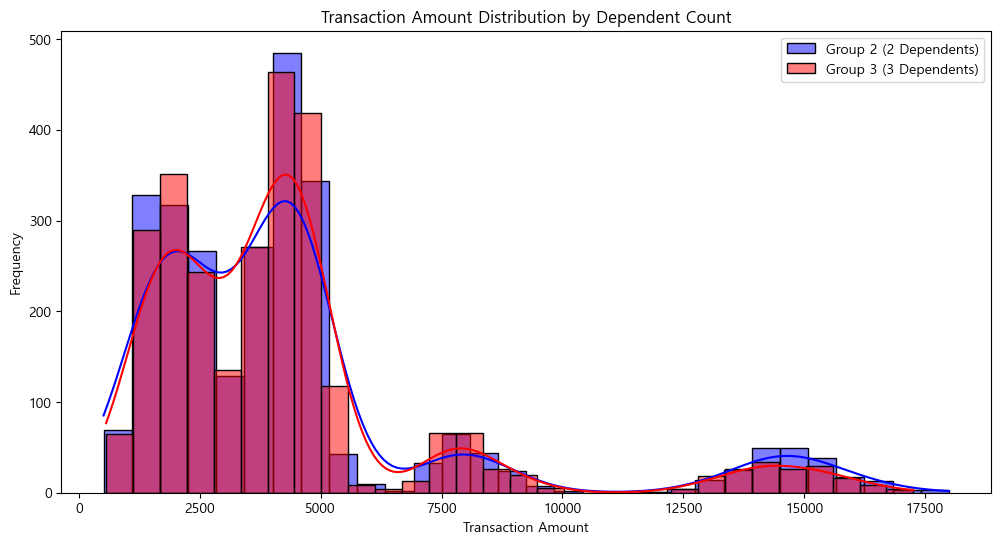

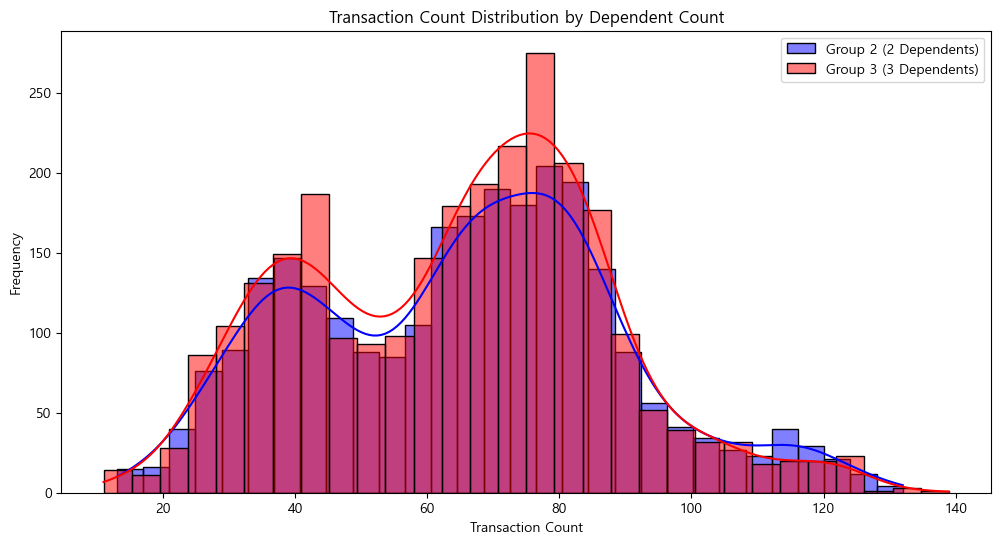

In [59]:
# 거래 금액 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(group_2['Total_Trans_Amt'], kde=True, color='blue', label='Group 2 (2 Dependents)', bins=30)
sns.histplot(group_3['Total_Trans_Amt'], kde=True, color='red', label='Group 3 (3 Dependents)', bins=30)
plt.title('Transaction Amount Distribution by Dependent Count')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 거래 횟수 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(group_2['Total_Trans_Ct'], kde=True, color='blue', label='Group 2 (2 Dependents)', bins=30)
sns.histplot(group_3['Total_Trans_Ct'], kde=True, color='red', label='Group 3 (3 Dependents)', bins=30)
plt.title('Transaction Count Distribution by Dependent Count')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


1. 거래금액 분포 
- 부양가족수가 2명인 그룹과 3명인 그룹의 분포는 전체적으로 유사하다. 2명인 그룹의 경우 더 높은 금액의 거래가 더 자주 발생하는것으로 나타남.,. 

2. 거래횟수분포 
- 두그룹간 차이는 보이지않지만 2명인그룹의 경우 평균적으로 더많은 거래횟수 보이는 경향 

ㅇㄹㄴ